# **Mission_1 토익 점수 데이터 분석**


## <미션>

최종 차수 점수 변화(Score_diff_total)와 feature들간의 관계를 분석하기 위한 가설 검증 수행
* 전처리 단계에서 생성한 데이터에 대한 탐색적 데이터 분석을 수행해봅시다.
* 개별 변수 및 개별 변수들 간의 관계에 대해 분석합니다.
* [도전 미션] 새로운 변수를 추가하여 데이터에 대한 탐색적 데이터 분석을 수행해봅시다.

## <환경설정>

### &nbsp;&nbsp; 1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

# 아래 필요한 라이브러리, 함수를 추가하시오.
## 코드 입력


### &nbsp;&nbsp; 2) 한글 폰트 설정하기

In [9]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### &nbsp;&nbsp; 3) 데이터 불러오기
    * toeic_preprocessed_data.csv

In [7]:
file = 'toeic_preprocessed_data.csv'
## 코드 입력
base_data = pd.read_csv(file)
base_data.head(10)

,ID,Gender,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,기출문제 공부 횟수,취약분야 인지 여부,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
0,1,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,7,알고 있음,10,181,173,354,227,213,440,241
1,2,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,4,알고 있음,14,330,290,620,354,339,693,55
2,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,4,알고 있음,4,367,309,676,396,365,761,37
3,4,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,9,알고 있음,8,470,285,755,495,341,836,56
4,5,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,6,알고 있음,4,273,372,645,314,426,740,95
5,6,F,1997,445,352,797,취업,온라인강의,영상 교재,주5-6회,9,알고 있음,7,360,256,616,372,269,641,156
6,7,F,1990,495,382,877,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주1-2회,4,알고 있음,4,487,337,824,495,341,836,41
7,8,M,1973,145,135,280,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,7,알고 있지 않음,7,132,129,261,133,130,263,17
8,9,M,1994,354,457,811,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,8,알고 있음,10,256,369,625,322,425,747,64
9,10,F,1984,423,346,769,승진,온라인강의,영상 교재,주5-6회,8,알고 있음,8,358,279,637,382,305,687,82


<br><br><hr>

## 1. 기본 분석


  - 데이터프레임의 크기를 확인
  - 데이터프레임의 컬럼명과 컬렴별 데이터 개수, 데이터 타입을 확인
  - 데이터프레임 전체에 대한 기초통계량 확인
  - 결측치(NaN) 확인
    * 결측치(NaN)가 존재한다면 적절하게 조치합니다.

#### &nbsp;&nbsp; 1-1) 데이터프레임 크기 확인

In [12]:
## shape 
## 코드 입력
base_data.shape

(500, 20)

#### &nbsp;&nbsp; 1-2) 컬럼명, 데이터 개수, 데이터 타입 확인

In [5]:
## info
## 코드 입력


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                500 non-null    int64 
 1   Gender            500 non-null    object
 2   Birth_Year        500 non-null    int64 
 3   3rd_LC_Score      500 non-null    int64 
 4   3rd_RC_Score      500 non-null    int64 
 5   3rd_Total_Score   500 non-null    int64 
 6   학습목표              500 non-null    object
 7   학습방법              500 non-null    object
 8   강의 학습 교재 유형       500 non-null    object
 9   학습빈도              500 non-null    object
 10  기출문제 공부 횟수        500 non-null    int64 
 11  취약분야 인지 여부        500 non-null    object
 12  토익 모의테스트 횟수       500 non-null    int64 
 13  1st_LC_Score      500 non-null    int64 
 14  1st_RC_Score      500 non-null    int64 
 15  1st_Total_Score   500 non-null    int64 
 16  2nd_LC_Score      500 non-null    int64 
 17  2nd_RC_Score    

In [13]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                500 non-null    int64 
 1   Gender            500 non-null    object
 2   Birth_Year        500 non-null    int64 
 3   3rd_LC_Score      500 non-null    int64 
 4   3rd_RC_Score      500 non-null    int64 
 5   3rd_Total_Score   500 non-null    int64 
 6   학습목표              500 non-null    object
 7   학습방법              500 non-null    object
 8   강의 학습 교재 유형       500 non-null    object
 9   학습빈도              500 non-null    object
 10  기출문제 공부 횟수        500 non-null    int64 
 11  취약분야 인지 여부        500 non-null    object
 12  토익 모의테스트 횟수       500 non-null    int64 
 13  1st_LC_Score      500 non-null    int64 
 14  1st_RC_Score      500 non-null    int64 
 15  1st_Total_Score   500 non-null    int64 
 16  2nd_LC_Score      500 non-null    int64 
 17  2nd_RC_Score    

#### &nbsp;&nbsp; 1-3) 기초통계량 확인

In [7]:
## describe
## 코드 입력

,ID,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,기출문제 공부 횟수,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,1992.906000,368.240000,369.518000,737.798000,5.098000,9.460000,313.878000,312.822000,626.70000,338.120000,338.154000,676.284000,61.514000
std,144.481833,8.224381,82.135393,81.665858,155.901584,2.779901,4.955554,85.555611,86.574966,148.57171,84.169535,83.854382,153.178624,39.739051
min,1.000000,1973.000000,141.000000,135.000000,280.000000,1.000000,1.000000,105.000000,84.000000,250.00000,120.000000,129.000000,260.000000,0.000000
25%,125.750000,1986.750000,295.000000,295.000000,591.750000,3.000000,5.000000,259.750000,250.000000,519.00000,279.000000,281.500000,557.750000,30.000000
50%,250.500000,1992.500000,372.500000,375.000000,760.500000,5.000000,8.000000,308.000000,311.500000,642.00000,333.500000,335.000000,691.000000,63.000000
75%,375.250000,2000.000000,434.250000,437.250000,860.250000,7.000000,13.250000,369.250000,377.250000,735.00000,395.250000,400.000000,790.500000,83.000000
max,500.000000,2007.000000,495.000000,495.000000,990.000000,10.000000,20.000000,495.000000,491.000000,970.00000,495.000000,495.000000,990.000000,281.000000


In [14]:
base_data.describe()

,ID,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,기출문제 공부 횟수,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,1992.906000,368.240000,369.518000,737.798000,5.098000,9.460000,313.878000,312.822000,626.70000,338.120000,338.154000,676.284000,61.514000
std,144.481833,8.224381,82.135393,81.665858,155.901584,2.779901,4.955554,85.555611,86.574966,148.57171,84.169535,83.854382,153.178624,39.739051
min,1.000000,1973.000000,141.000000,135.000000,280.000000,1.000000,1.000000,105.000000,84.000000,250.00000,120.000000,129.000000,260.000000,0.000000
25%,125.750000,1986.750000,295.000000,295.000000,591.750000,3.000000,5.000000,259.750000,250.000000,519.00000,279.000000,281.500000,557.750000,30.000000
50%,250.500000,1992.500000,372.500000,375.000000,760.500000,5.000000,8.000000,308.000000,311.500000,642.00000,333.500000,335.000000,691.000000,63.000000
75%,375.250000,2000.000000,434.250000,437.250000,860.250000,7.000000,13.250000,369.250000,377.250000,735.00000,395.250000,400.000000,790.500000,83.000000
max,500.000000,2007.000000,495.000000,495.000000,990.000000,10.000000,20.000000,495.000000,491.000000,970.00000,495.000000,495.000000,990.000000,281.000000


#### &nbsp;&nbsp; 1-4) 결측치(N/A) 개수 확인

In [8]:
## 결측치 포함 여부 : isna
## 코드 입력

ID                  0
Gender              0
Birth_Year          0
3rd_LC_Score        0
3rd_RC_Score        0
3rd_Total_Score     0
학습목표                0
학습방법                0
강의 학습 교재 유형         0
학습빈도                0
기출문제 공부 횟수          0
취약분야 인지 여부          0
토익 모의테스트 횟수         0
1st_LC_Score        0
1st_RC_Score        0
1st_Total_Score     0
2nd_LC_Score        0
2nd_RC_Score        0
2nd_Total_Score     0
Score_diff_total    0
dtype: int64

In [15]:
base_data.isnull().sum()

ID                  0
Gender              0
Birth_Year          0
3rd_LC_Score        0
3rd_RC_Score        0
3rd_Total_Score     0
학습목표                0
학습방법                0
강의 학습 교재 유형         0
학습빈도                0
기출문제 공부 횟수          0
취약분야 인지 여부          0
토익 모의테스트 횟수         0
1st_LC_Score        0
1st_RC_Score        0
1st_Total_Score     0
2nd_LC_Score        0
2nd_RC_Score        0
2nd_Total_Score     0
Score_diff_total    0
dtype: int64

<br><br><hr>

## 2. 단변량 분석


- 주요 변수들의 분포를 살펴보며 비즈니스를 파악합시다.
- 단일 변수로 분석
    * 숫자형 변수 : 기초통계량, 히스토그램, kdeplot, 박스플롯
    * 범주형 변수 : 범주별 빈도수, 바 플롯

#### &nbsp;&nbsp; 2-1) 최종 차수 점수 변화(Score_diff_total)

,count,mean,std,min,25%,50%,75%,max
Score_diff_total,500.0,61.514,39.739051,0.0,30.0,63.0,83.0,281.0


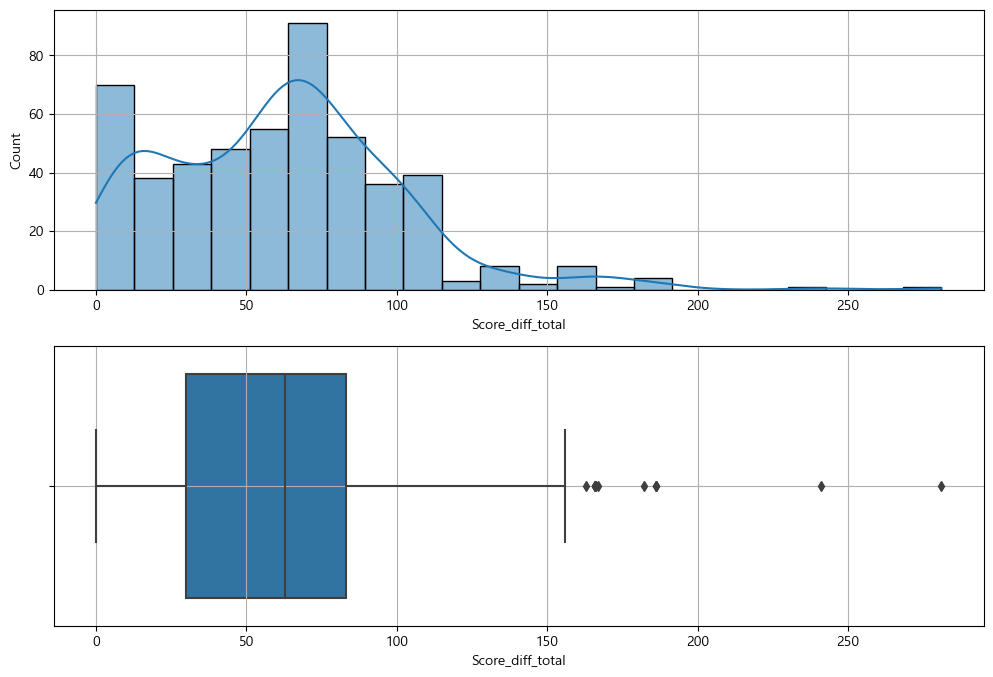

In [9]:
## 'Score_diff_total' 변수의 기초통계량 확인 .T를 활용해서 한줄로 표현
## 코드 입력
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
## 'Score_diff_total' 변수의 histplot그리기
## 코드 입력
sns.histplot()
plt.grid()

plt.subplot(2,1,2)

## 'Score_diff_total' 변수의 boxplot 그리기
## 코드 입력
sns.boxplot()

plt.grid()

plt.show()

0    241
1     55
2     37
3     56
4     95
Name: Score_diff_total, dtype: int64

,count,mean,std,min,25%,50%,75%,max
Score_diff_total,500.0,61.514,39.739051,0.0,30.0,63.0,83.0,281.0


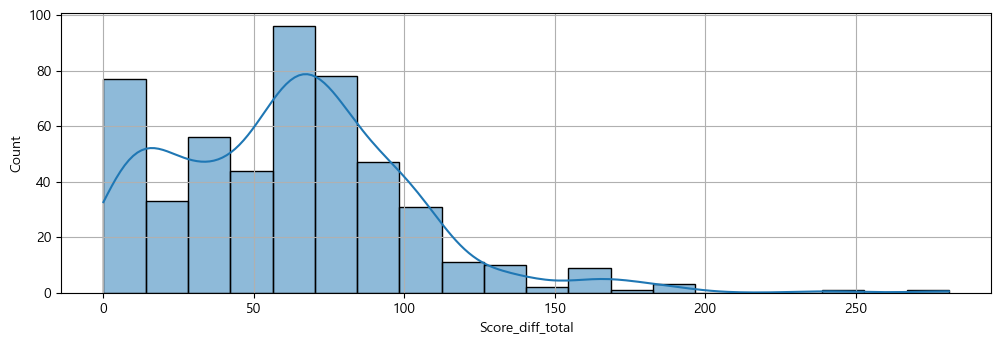

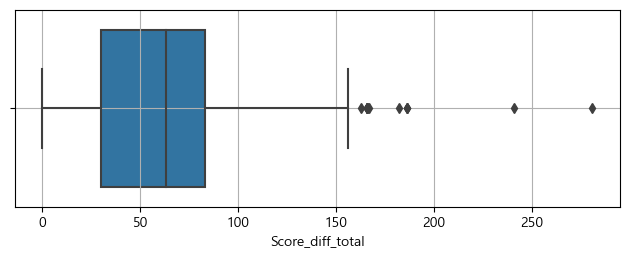

In [35]:
display(base_data['Score_diff_total'].head())
display(base_data['Score_diff_total'].to_frame().describe().T)

plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
sns.histplot(base_data['Score_diff_total'], bins = 20, kde = True)
plt.xlabel('Score_diff_total')
plt.grid()
plt.show()

plt.subplot(2,1,2)
sns.boxplot(x = base_data['Score_diff_total'])

plt.grid()
plt.tight_layout()

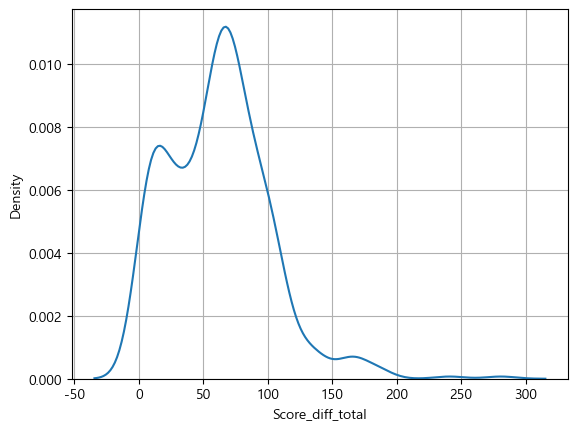

In [10]:
## 'Score_diff_total' 변수의 kdeplot 그리기
## 코드 입력

# base_data 기본 데이터

sns.kdeplot(   )

plt.grid()

plt.show()

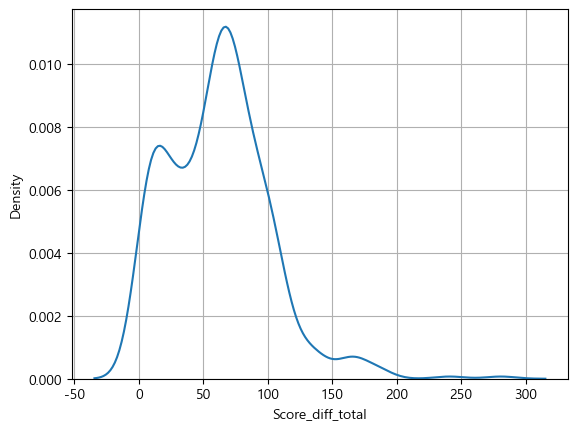

In [36]:
sns.kdeplot(base_data['Score_diff_total'])
plt.grid()

#### &nbsp;&nbsp; 2-2) 범주형 변수
   * 분석 방법 : 범주별 빈도수, countplot
   * 대상 변수 : Gender, 학습목표, 학습방법, 강의 학습 교재 유형, 학습빈도, 취약분야 인지 여부

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-1) 'Gender'

M    250
F    250
Name: Gender, dtype: int64
M    0.5
F    0.5
Name: Gender, dtype: float64


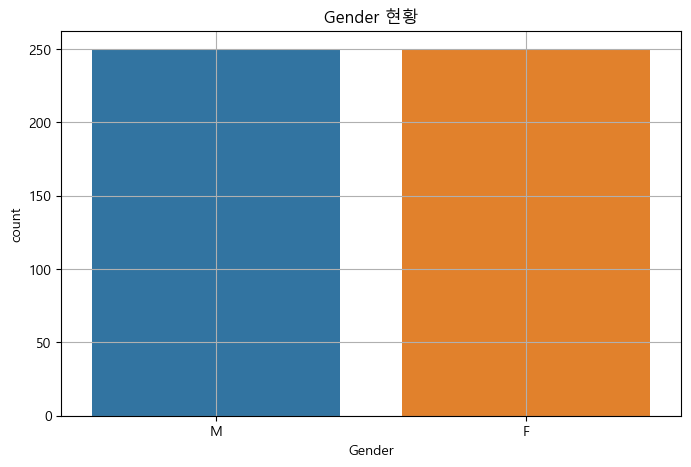

In [11]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력


## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력


plt.figure(figsize=(8, 5))
## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot()

plt.title('Gender 현황')
plt.grid()
# plt.show()

M    250
F    250
Name: Gender, dtype: int64

M    0.5
F    0.5
Name: Gender, dtype: float64

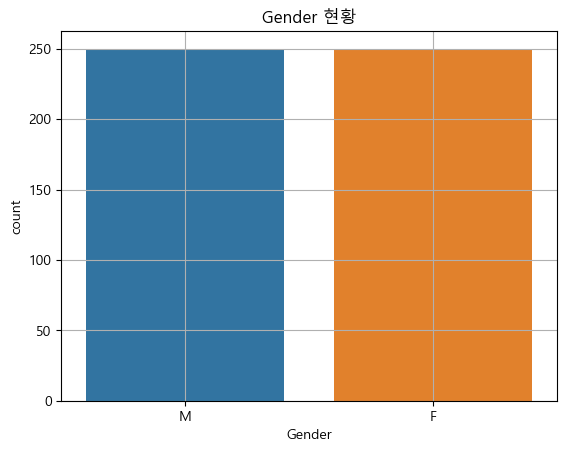

In [45]:
display(base_data['Gender'].value_counts())

display(base_data['Gender'].value_counts()/base_data.shape[0])
sns.countplot(x='Gender', data = base_data)
plt.title('Gender 현황')
plt.grid()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-2) 학습목표

자기계발    329
승진      155
취업       16
Name: 학습목표, dtype: int64
자기계발    0.658
승진      0.310
취업      0.032
Name: 학습목표, dtype: float64


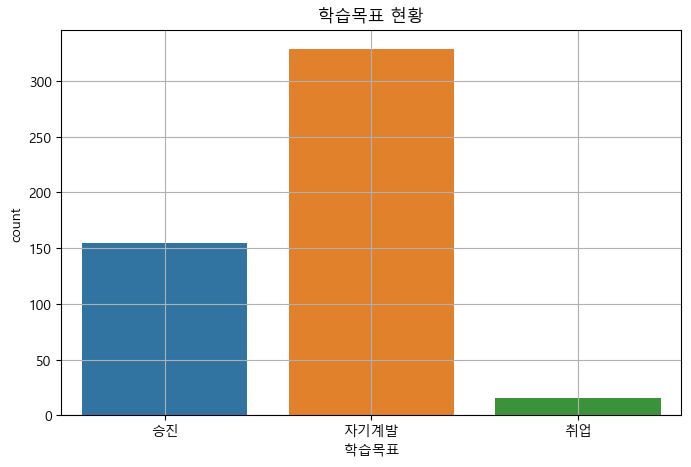

In [12]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력

plt.figure(figsize=(8, 5))
## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot()

plt.title('학습목표 현황')
plt.grid()
# plt.show()

자기계발    329
승진      155
취업       16
Name: 학습목표, dtype: int64

자기계발    0.658
승진      0.310
취업      0.032
Name: 학습목표, dtype: float64

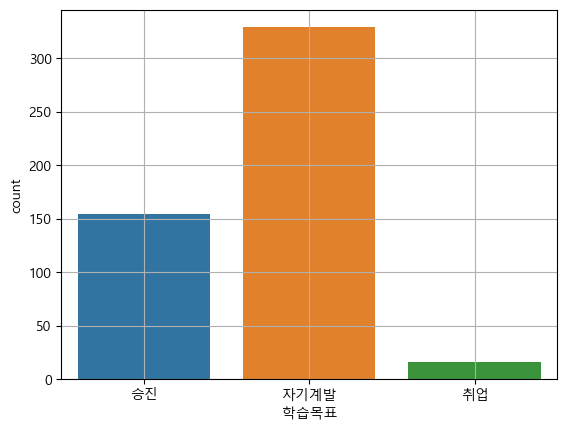

In [53]:
display(base_data['학습목표'].value_counts())

display(base_data['학습목표'].value_counts()/base_data.shape[0])

sns.countplot( x = '학습목표', data = base_data)
plt.title('학습목표 현황')
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-3) 학습방법

온라인강의     208
오프라인강의    162
참고서       130
Name: 학습방법, dtype: int64
온라인강의     0.416
오프라인강의    0.324
참고서       0.260
Name: 학습방법, dtype: float64


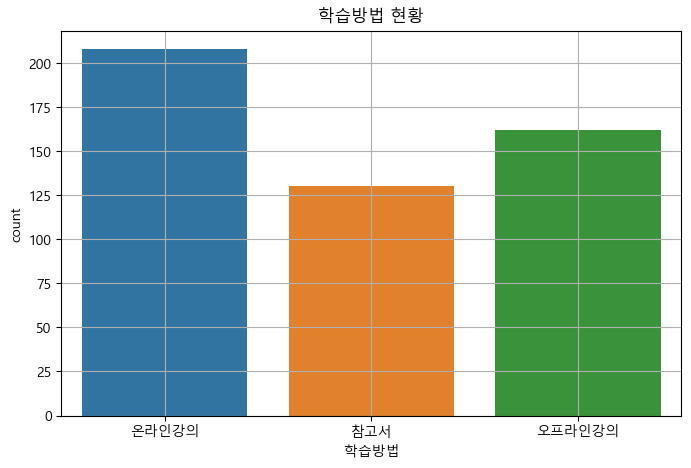

In [13]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력


plt.figure(figsize=(8, 5))
## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot()

plt.title('학습방법 현황')
plt.grid()
plt.show()


온라인강의     208
오프라인강의    162
참고서       130
Name: 학습방법, dtype: int64

온라인강의     0.416
오프라인강의    0.324
참고서       0.260
Name: 학습방법, dtype: float64

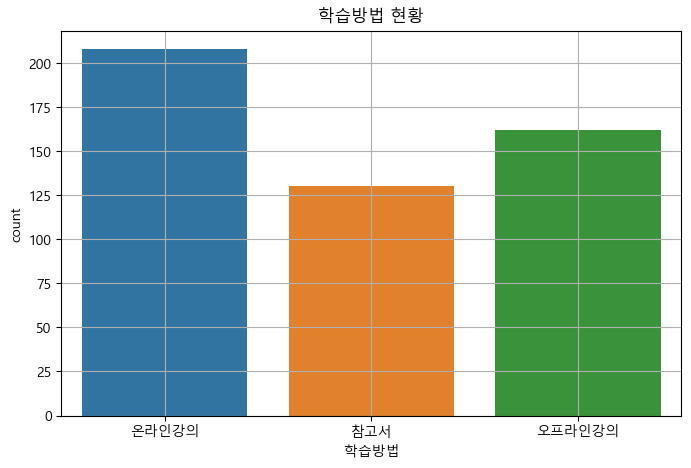

In [57]:
display(base_data['학습방법'].value_counts())
display(base_data['학습방법'].value_counts()/base_data.shape[0])

plt.figure(figsize = (8,5))
sns.countplot(x='학습방법', data = base_data)
plt.title('학습방법 현황')
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-4) 강의 학습 교재 유형 

일반적인 영어 텍스트 기반 교재        136
영상 교재                    128
뉴스/이슈 기반 교재              122
비즈니스 시뮬레이션(Role Play)    114
Name: 강의 학습 교재 유형, dtype: int64
일반적인 영어 텍스트 기반 교재        0.272
영상 교재                    0.256
뉴스/이슈 기반 교재              0.244
비즈니스 시뮬레이션(Role Play)    0.228
Name: 강의 학습 교재 유형, dtype: float64


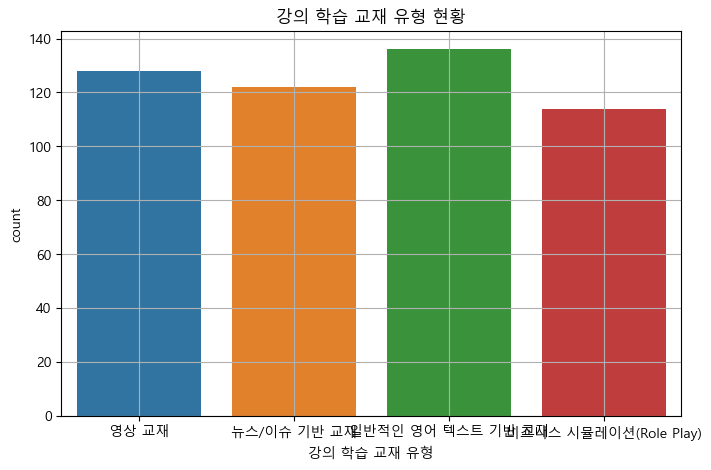

In [14]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력

plt.figure(figsize=(8, 5))
## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot()


plt.title('강의 학습 교재 유형 현황')
plt.grid()
plt.show()


일반적인 영어 텍스트 기반 교재        136
영상 교재                    128
뉴스/이슈 기반 교재              122
비즈니스 시뮬레이션(Role Play)    114
Name: 강의 학습 교재 유형, dtype: int64

일반적인 영어 텍스트 기반 교재        0.272
영상 교재                    0.256
뉴스/이슈 기반 교재              0.244
비즈니스 시뮬레이션(Role Play)    0.228
Name: 강의 학습 교재 유형, dtype: float64

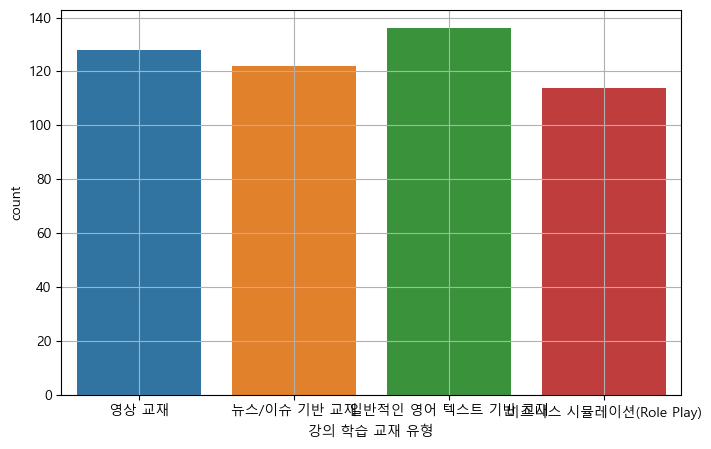

In [64]:
# display(base_data.columns)
display(base_data['강의 학습 교재 유형'].value_counts())
display(base_data['강의 학습 교재 유형'].value_counts()/base_data.shape[0])


plt.figure(figsize = (8,5))
sns.countplot(x='강의 학습 교재 유형', data=base_data)
plt.grid()
plt.show()


##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-5) 학습빈도 

주3-4회       151
주5-6회       127
주1-2회       124
매일(주 7회)     98
Name: 학습빈도, dtype: int64
주3-4회       0.302
주5-6회       0.254
주1-2회       0.248
매일(주 7회)    0.196
Name: 학습빈도, dtype: float64


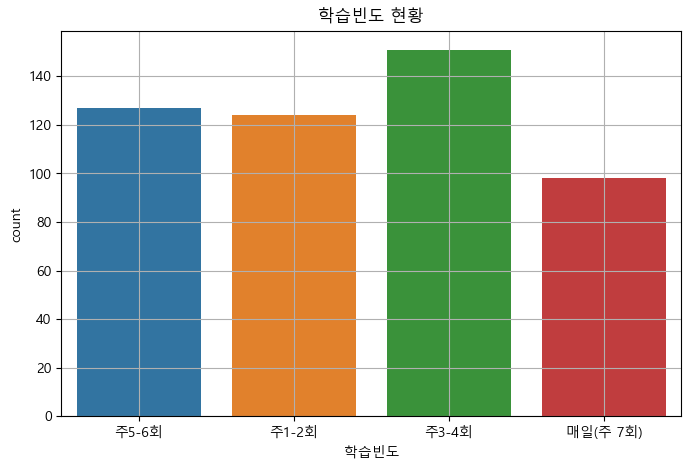

In [15]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력


## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력

plt.figure(figsize=(8, 5))
## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot()

plt.title('학습빈도 현황')
plt.grid()
plt.show()

주3-4회       151
주5-6회       127
주1-2회       124
매일(주 7회)     98
Name: 학습빈도, dtype: int64

주3-4회       0.302
주5-6회       0.254
주1-2회       0.248
매일(주 7회)    0.196
Name: 학습빈도, dtype: float64

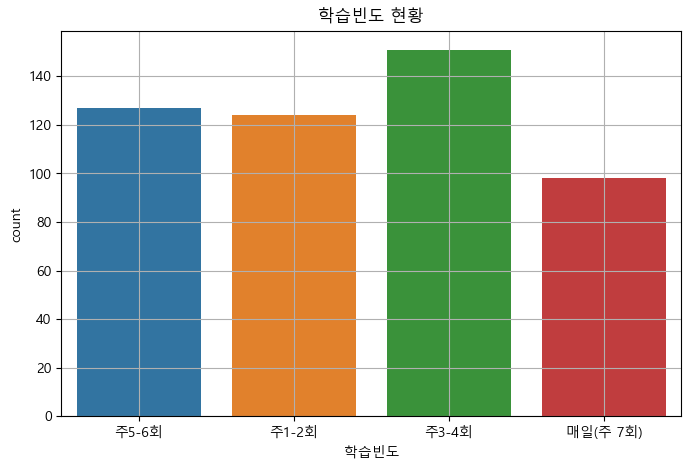

In [68]:
display(base_data['학습빈도'].value_counts())
display(base_data['학습빈도'].value_counts()/base_data.shape[0])

plt.figure(figsize=(8,5))
sns.countplot(x='학습빈도', data = base_data)
plt.grid()
plt.title('학습빈도 현황')
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-6) 취약분야 인지 여부

알고 있음       461
알고 있지 않음     39
Name: 취약분야 인지 여부, dtype: int64
알고 있음       0.922
알고 있지 않음    0.078
Name: 취약분야 인지 여부, dtype: float64


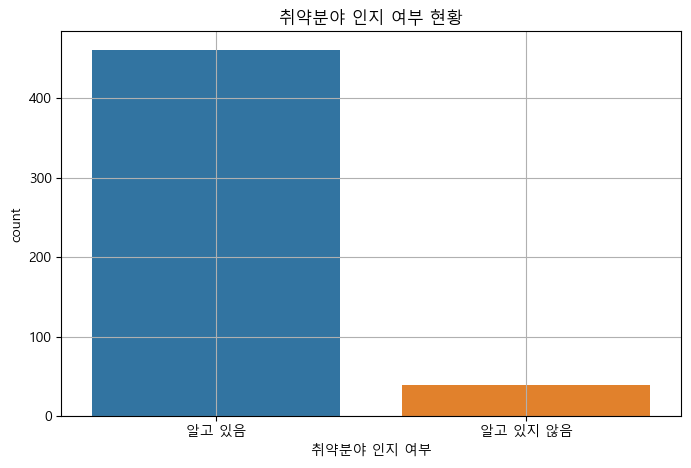

In [16]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력


## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력


plt.figure(figsize=(8, 5))
## 그래프 분석하기 : countplot()
## 코드 입력
sns.countplot()

plt.title('취약분야 인지 여부 현황')
plt.grid()
plt.show()


알고 있음       461
알고 있지 않음     39
Name: 취약분야 인지 여부, dtype: int64

알고 있음       0.922
알고 있지 않음    0.078
Name: 취약분야 인지 여부, dtype: float64

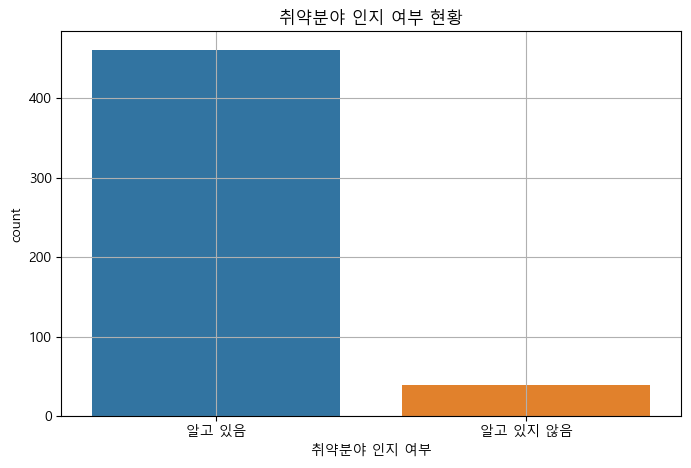

In [73]:
# display(base_data.columns)
display(base_data['취약분야 인지 여부'].value_counts())
display(base_data['취약분야 인지 여부'].value_counts()/base_data.shape[0])

plt.figure(figsize= (8,5))
plt.title('취약분야 인지 여부 현황')

sns.countplot(x = '취약분야 인지 여부', data = base_data)
plt.grid()
plt.title('취약분야 인지 여부 현황')
plt.show()

#### &nbsp;&nbsp; 2-3) 수치형 변수
   * 분석 방법 : 기초 통계, 히스토그램, boxplot
   * 대상 변수 : 'Birth_Year', '기출문제 공부 횟수','토익 모의테스트 횟수',  '1st_Total_Score', '2st_Total_Score'
             

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-1) Bitrh_Year

,count,mean,std,min,25%,50%,75%,max
Birth_Year,500.0,1992.906,8.224381,1973.0,1986.75,1992.5,2000.0,2007.0


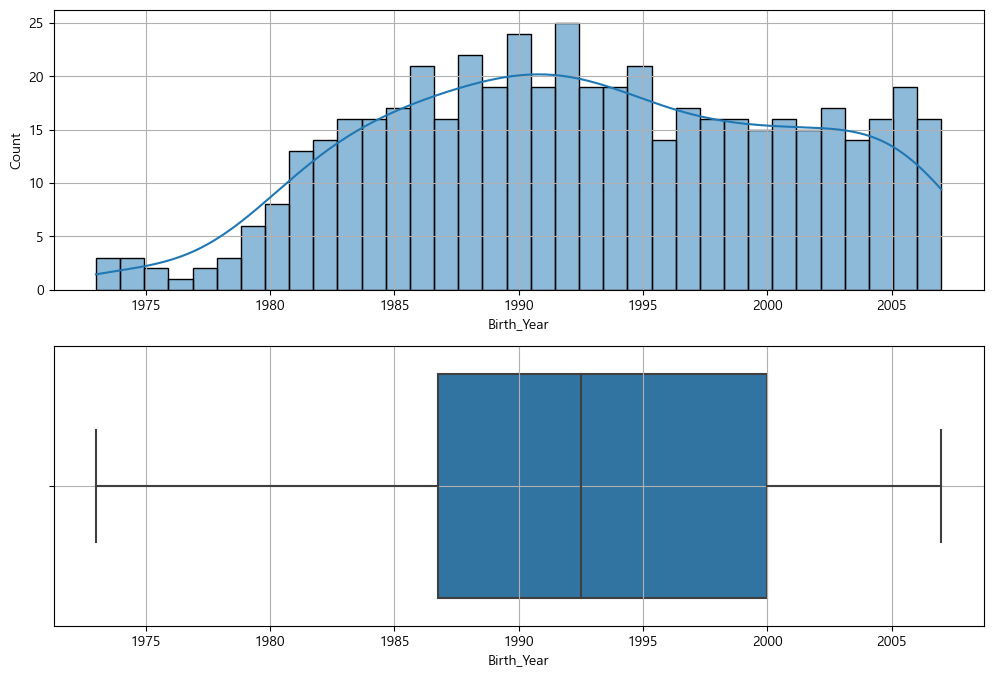

In [17]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력


## 그래프 분석

plt.figure(figsize = (12,8))
plt.subplot(2,1,1)

## 히스토그램을 이용한 데이터 분포 확인
## 코드 입력
sns.histplot()

plt.grid()

plt.subplot(2,1,2)
## boxplot 이용한 데이터 분포 확인
## 코드 입력
sns.boxplot()

plt.grid()

plt.show()

,count,mean,std,min,25%,50%,75%,max
Birth_Year,500.0,1992.906,8.224381,1973.0,1986.75,1992.5,2000.0,2007.0


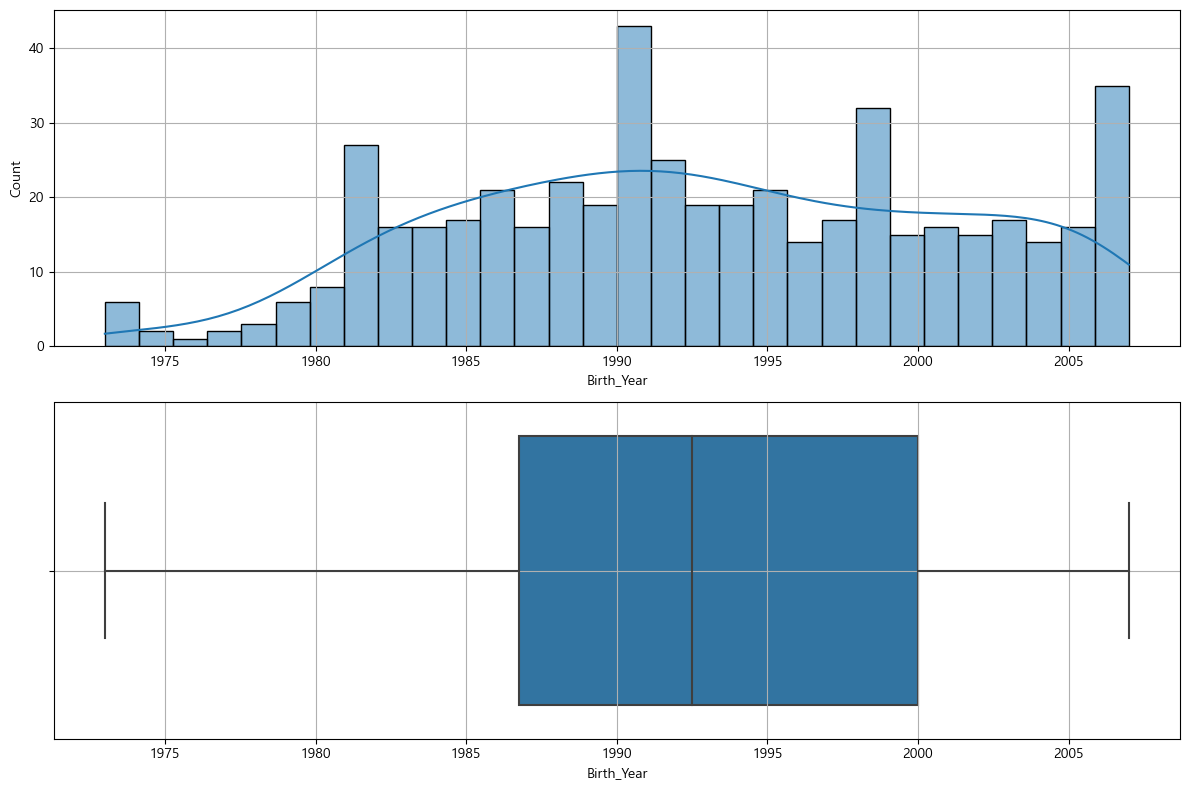

In [85]:
display(base_data['Birth_Year'].to_frame().describe().T)

plt.figure(figsize = (12,8))
plt.subplot(2,1,1)

plt.subplot(2,1,1)
sns.histplot(base_data['Birth_Year'], bins = 30,kde=True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x=base_data['Birth_Year'])
plt.grid()

plt.tight_layout()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-2) 기출문제 공부 횟수

,count,mean,std,min,25%,50%,75%,max
기출문제 공부 횟수,500.0,5.098,2.779901,1.0,3.0,5.0,7.0,10.0


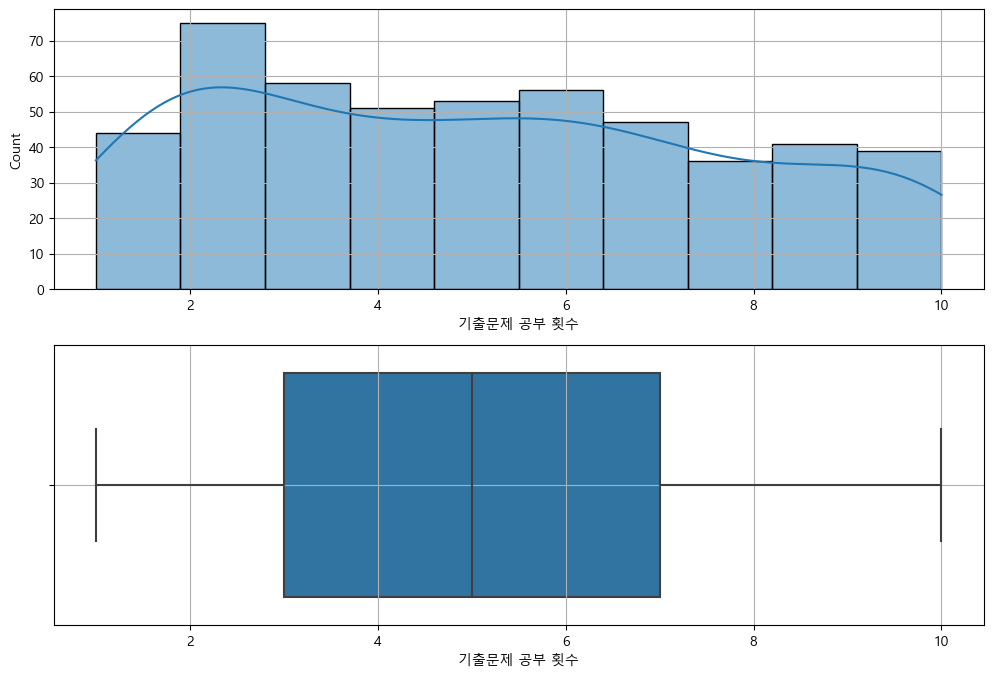

In [18]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력


## 그래프 분석

plt.figure(figsize = (12,8))
plt.subplot(2,1,1)

## 히스토그램을 이용한 데이터 분포 확인
## 코드 입력
sns.histplot()

plt.grid()

plt.subplot(2,1,2)

## boxplot 이용한 데이터 분포 확인
## 코드 입력
sns.boxplot()

plt.grid()

plt.show()

,count,mean,std,min,25%,50%,75%,max
기출문제 공부 횟수,500.0,5.098,2.779901,1.0,3.0,5.0,7.0,10.0


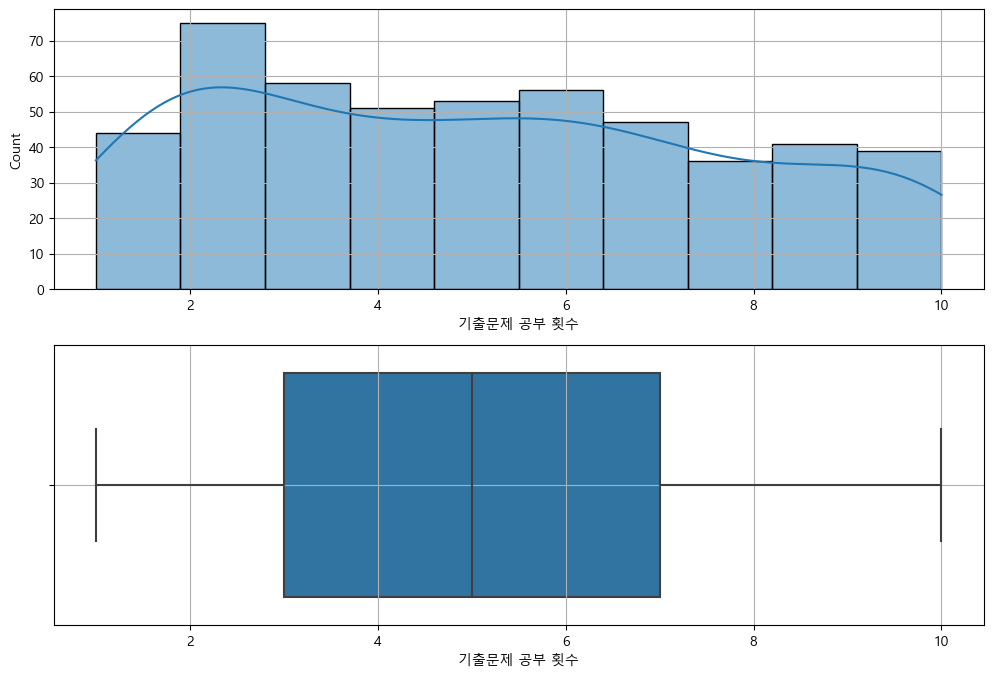

In [90]:
display(base_data['기출문제 공부 횟수'].to_frame().describe().T)

plt.figure(figsize = (12,8))
plt.subplot(2,1,1)
sns.histplot(base_data['기출문제 공부 횟수'],bins=10,kde=True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x=base_data['기출문제 공부 횟수'])
plt.grid()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-3) 토익 모의테스트 횟수

,count,mean,std,min,25%,50%,75%,max
토익 모의테스트 횟수,500.0,9.46,4.955554,1.0,5.0,8.0,13.25,20.0


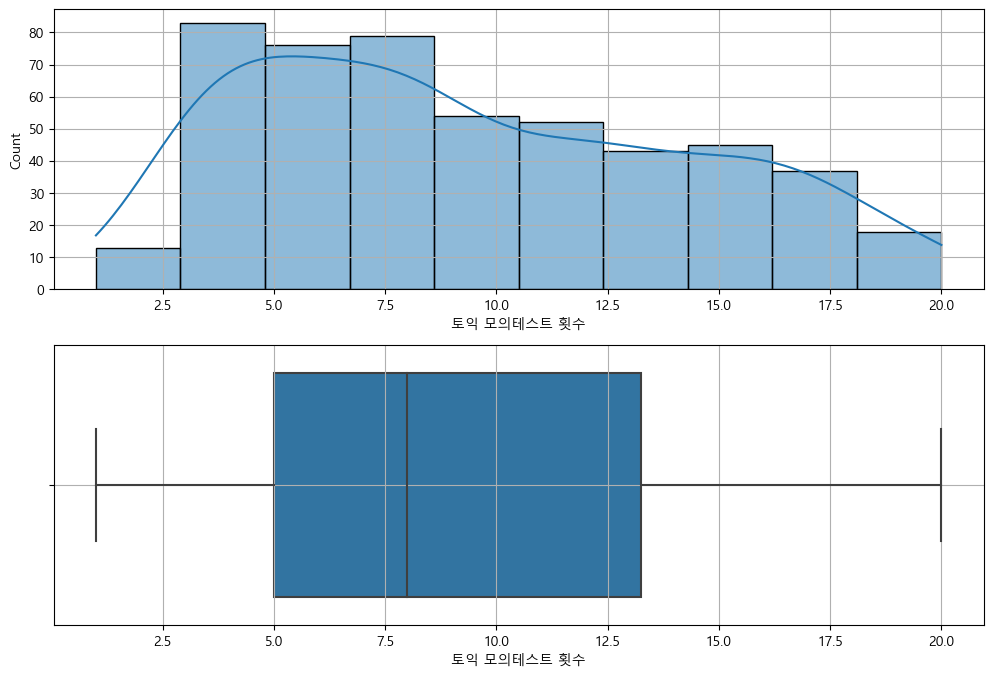

In [19]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력

## 그래프 분석
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
## 히스토그램을 이용한 데이터 분포 확인
## 코드 입력
sns.histplot()

plt.grid()

plt.subplot(2,1,2)
## boxplot 이용한 데이터 분포 확인
## 코드 입력
sns.boxplot()

plt.grid()

plt.show()

,count,mean,std,min,25%,50%,75%,max
토익 모의테스트 횟수,500.0,9.46,4.955554,1.0,5.0,8.0,13.25,20.0


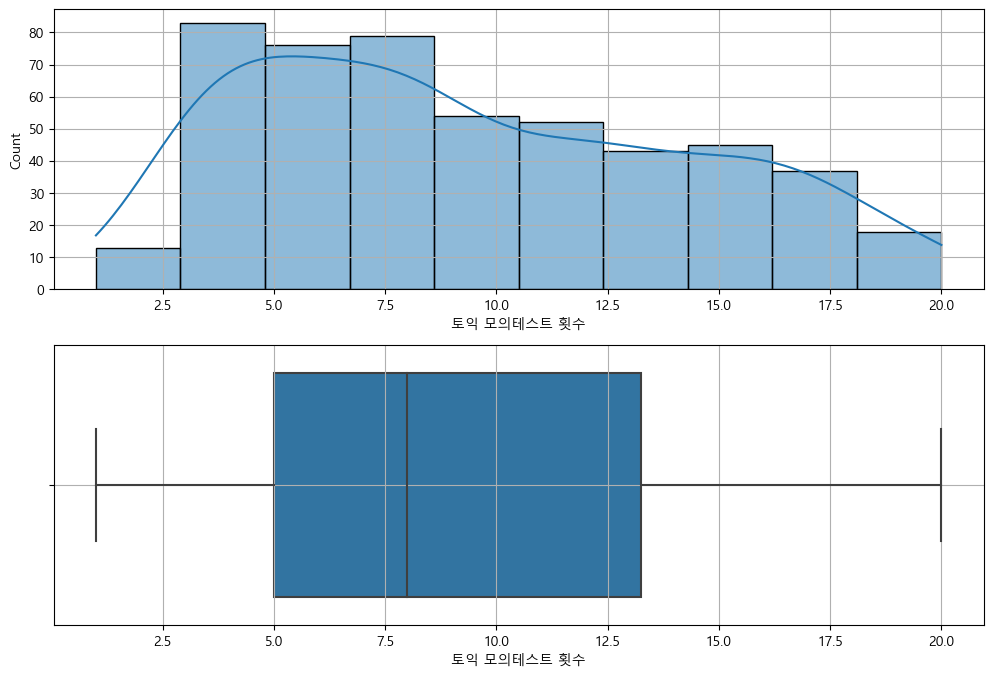

In [94]:
display(base_data['토익 모의테스트 횟수'].to_frame().describe().T)

plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
sns.histplot(base_data['토익 모의테스트 횟수'], bins=10, kde=True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = base_data['토익 모의테스트 횟수'])
plt.grid()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-4) 1st_Total_Score

,count,mean,std,min,25%,50%,75%,max
1st_Total_Score,500.0,626.7,148.57171,250.0,519.0,642.0,735.0,970.0


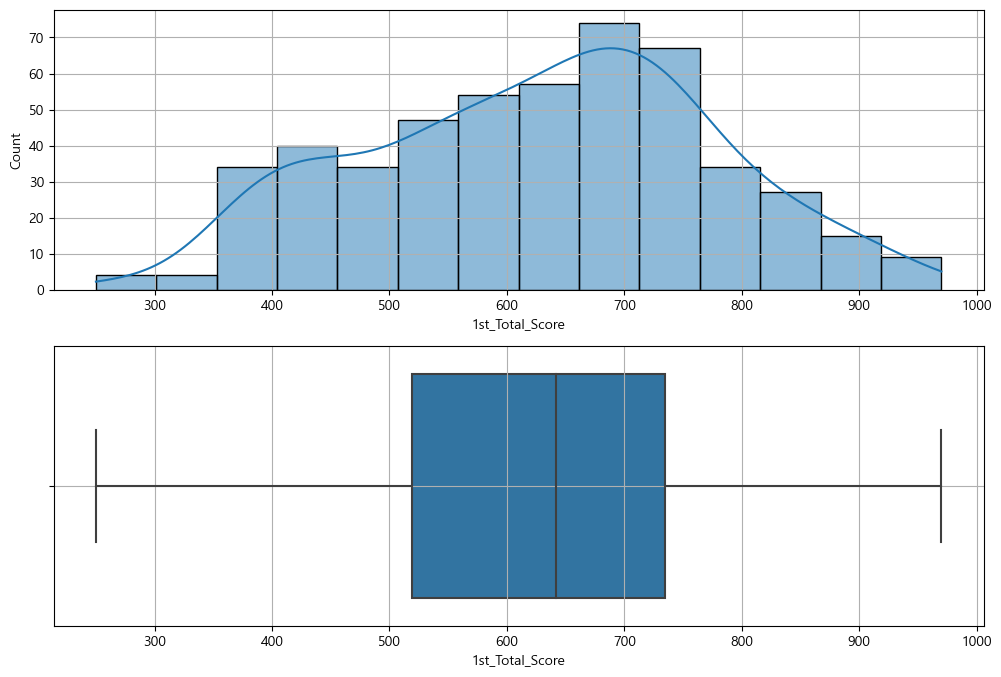

In [20]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력

## 그래프 분석
plt.figure(figsize = (12,8))
plt.subplot(2,1,1)

## 히스토그램을 이용한 데이터 분포 확인
## 코드 입력
sns.histplot()

plt.grid()

plt.subplot(2,1,2)
## boxplot 이용한 데이터 분포 확인
## 코드 입력
sns.boxplot()

plt.grid()

plt.show()

,count,mean,std,min,25%,50%,75%,max
1st_Total_Score,500.0,626.7,148.57171,250.0,519.0,642.0,735.0,970.0


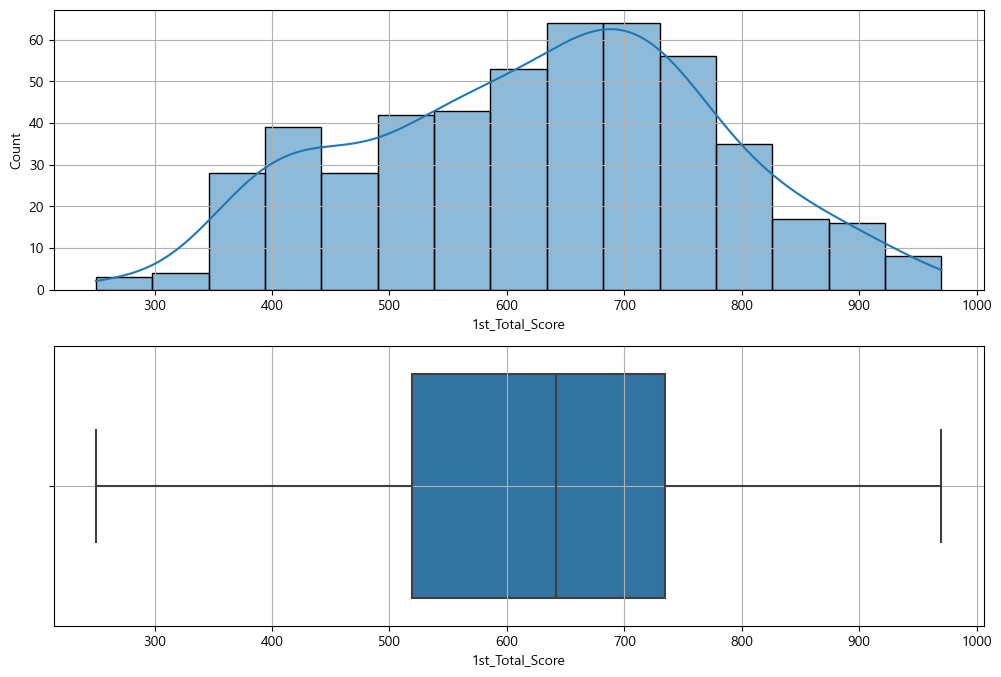

In [100]:
display( base_data['1st_Total_Score'].to_frame().describe().T)

plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
sns.histplot(base_data['1st_Total_Score'],bins = 15, kde = True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x=base_data['1st_Total_Score'])
plt.grid()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-5) 2nd_Total_Score

,count,mean,std,min,25%,50%,75%,max
2nd_Total_Score,500.0,676.284,153.178624,260.0,557.75,691.0,790.5,990.0


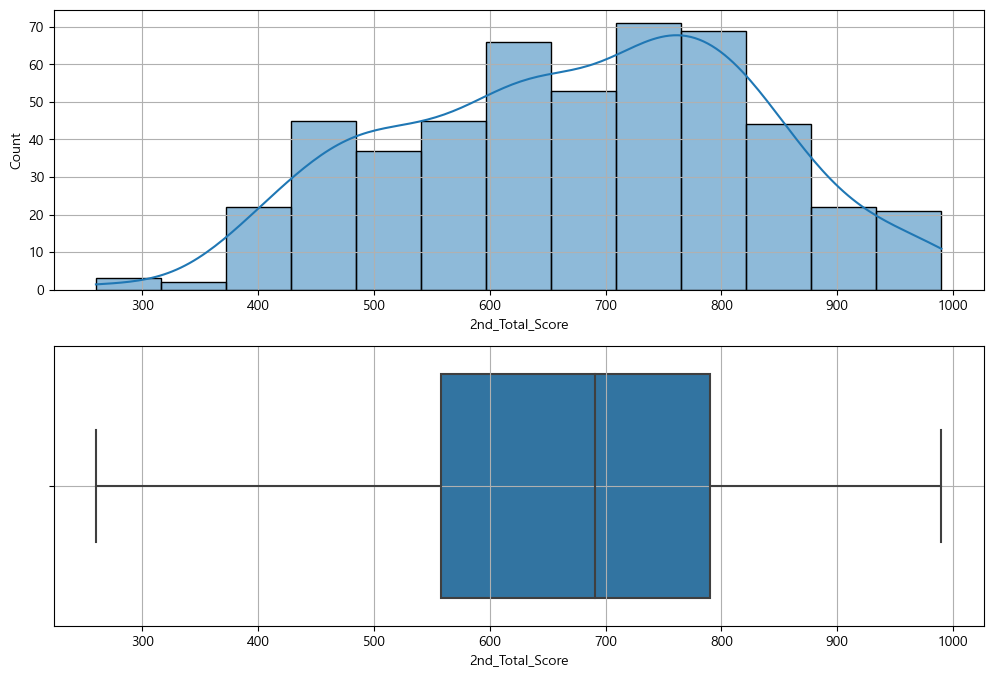

In [21]:
## 수치형 변수의 기초 통계량 확인 : describe
## 코드 입력

## 그래프 분석
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
## 히스토그램을 이용한 데이터 분포 확인
## 코드 입력
sns.histplot()

plt.grid()

plt.subplot(2,1,2)
## boxplot 이용한 데이터 분포 확인
## 코드 입력
sns.boxplot()

plt.grid()

plt.show()

,count,mean,std,min,25%,50%,75%,max
2nd_Total_Score,500.0,676.284,153.178624,260.0,557.75,691.0,790.5,990.0


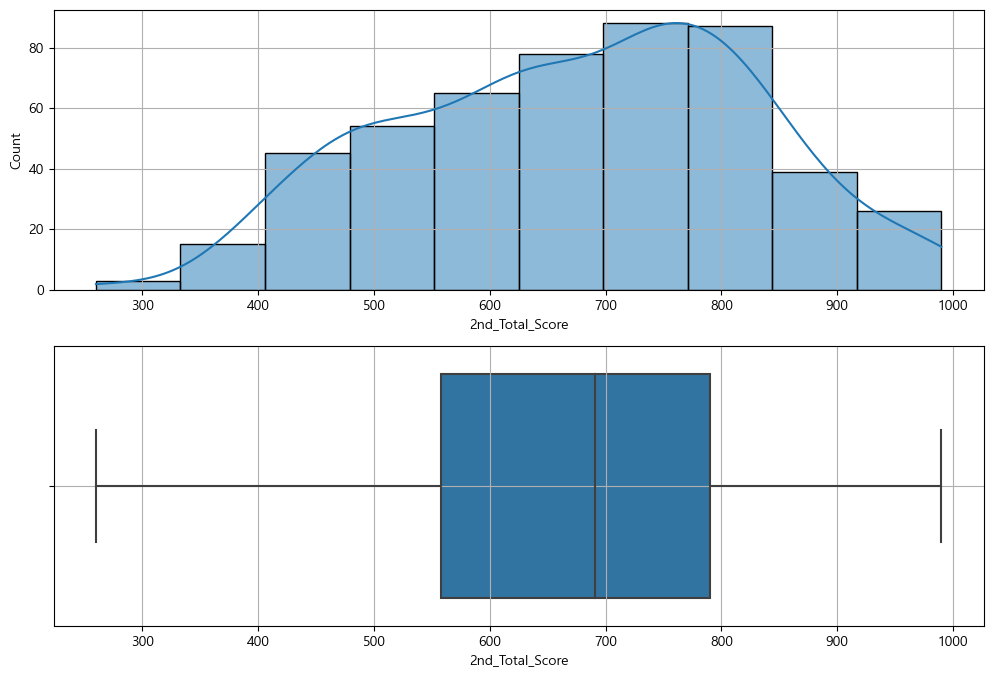

In [102]:
display(base_data['2nd_Total_Score'].to_frame().describe().T)

plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
sns.histplot(base_data['2nd_Total_Score'], bins=10, kde=True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = base_data['2nd_Total_Score'])
plt.grid()

plt.show()

## [정리] 단변량 분석을 통해 파악된 비즈니스 인사이트는 무엇인가요?

In [ ]:
# 점수 상승폭이 적은 곳에 데이터가 데이터가 더 많은 경향이 있다.

# 사람들이 선호하는 강의 교재 학습 내용에 대해 분석할 수 있다.

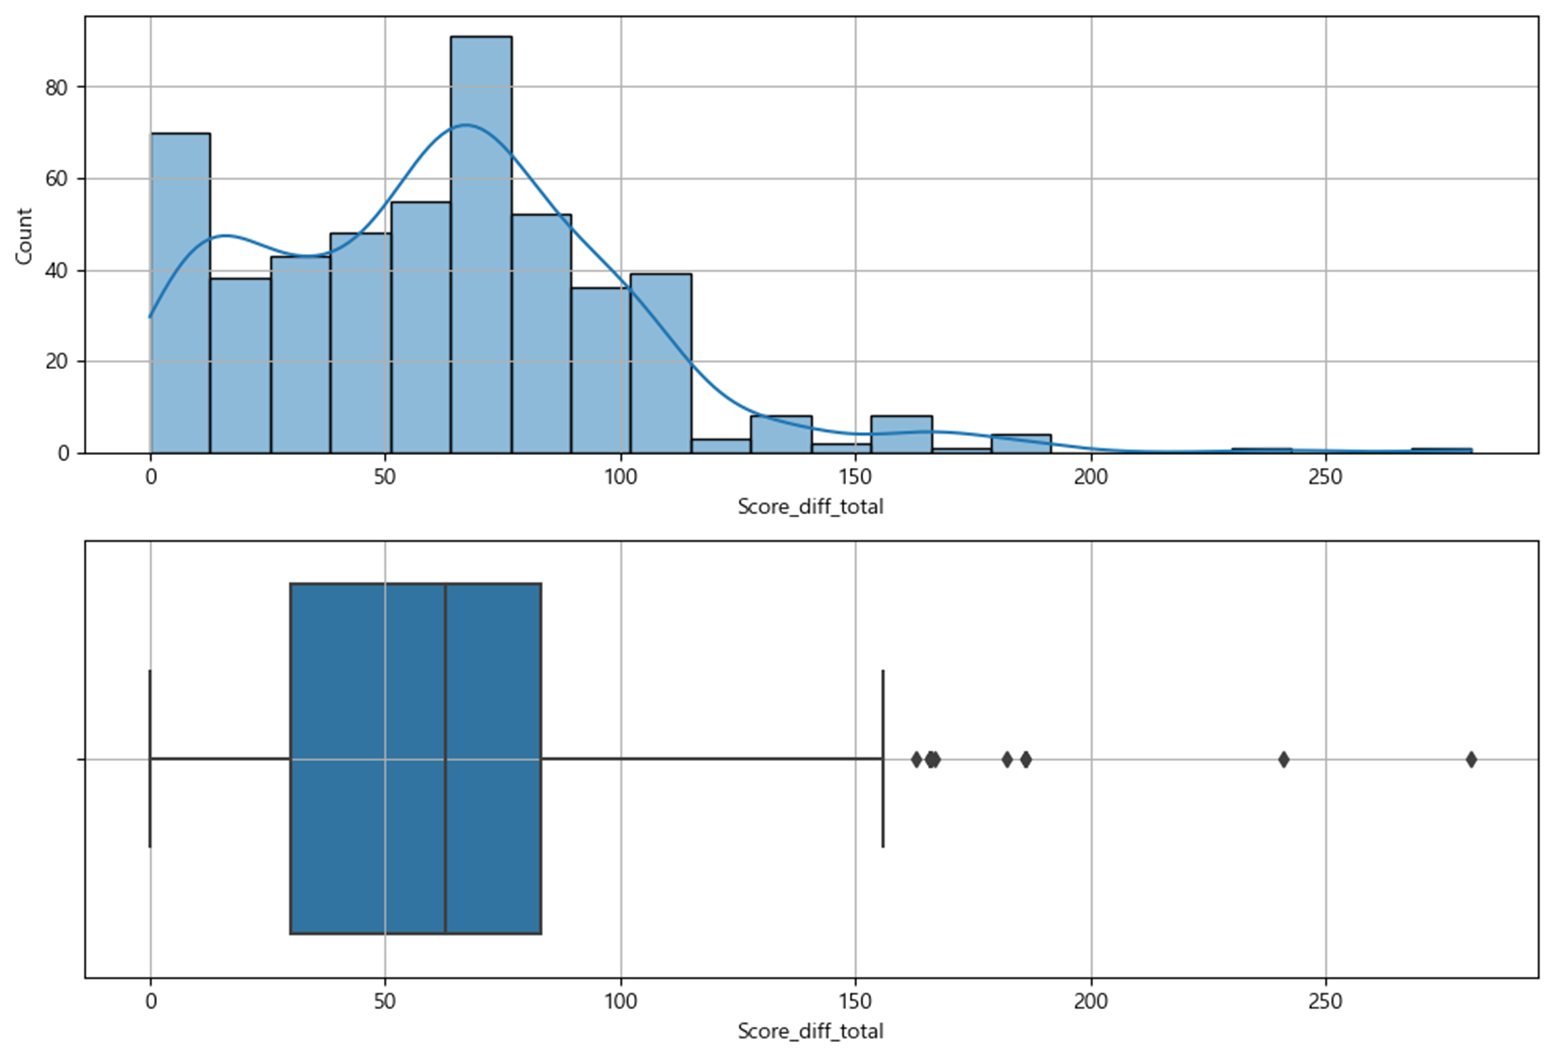

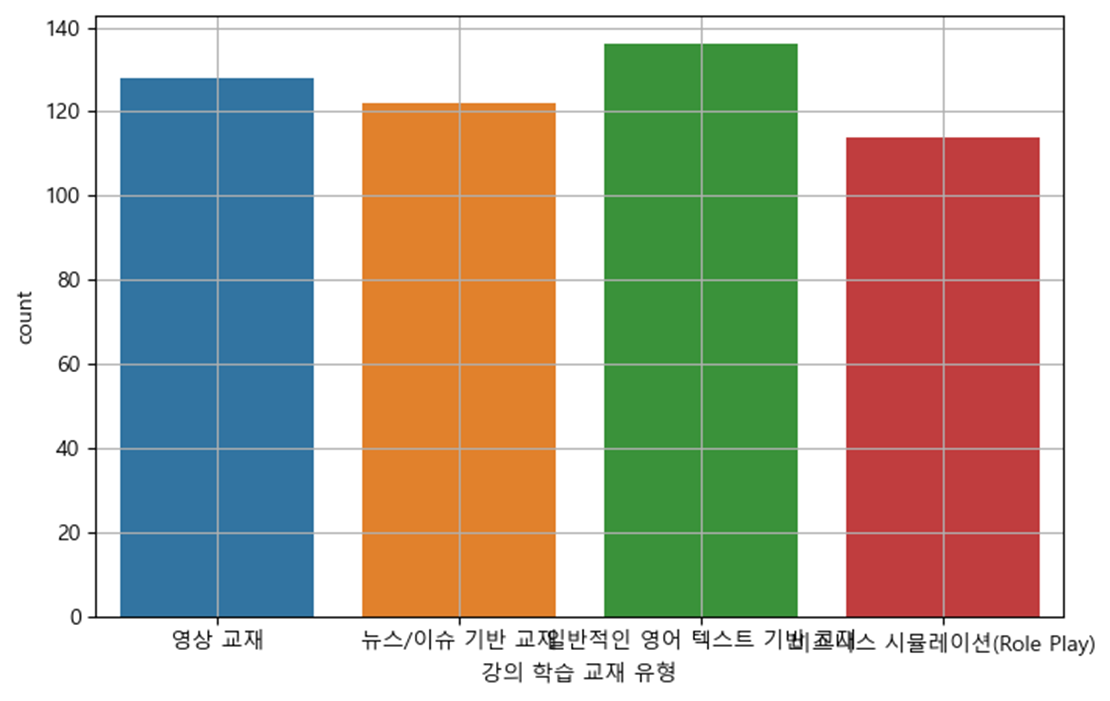

<br><br><hr><br><br>

## 3. 이변량 분석

- 수치형 feature --> 수치형 target
    - 전체 변수들 간의 상관관계 구하기
        * 범주형 변수를 제외한 데이터셋을 이용하여
        * .corr() + sns.heatmap() 으로 전체 상관계수를 시각화
    - 상관계수 상위 몇개에 대해서 feature와 target에 대해 
        * 상관분석을 통해 상관계수가 유의미함을 분석
        * 산점도를 통해 상관관계를 시각화하여 분석
- 범주형 feature --> 수치형 target
    * 범주간에 target의 평균의 차이가 있는지 분석
    * 범주별 barplot으로 평균의 차이를 시각화하여 분석

#### &nbsp;&nbsp; 3-1) 수치형 feature --> 수치형 target


##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-1) 전체 수치형 변수들 간의 상관관계 분석

* 수치형 변수 리스트 만들기

In [103]:
# 수치형 변수 리스트 정의

col_num = ['Birth_Year','3rd_LC_Score','3rd_RC_Score','3rd_Total_Score', '기출문제 공부 횟수','토익 모의테스트 횟수', '1st_LC_Score', '1st_RC_Score', '1st_Total_Score',
            '2nd_LC_Score', '2nd_RC_Score', '2nd_Total_Score', 'Score_diff_total']

In [104]:
## 수치형 변수들의 데이터 확인
base_data[col_num]

,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,기출문제 공부 횟수,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
0,1973,345,336,681,7,10,181,173,354,227,213,440,241
1,1982,380,368,748,4,14,330,290,620,354,339,693,55
2,1995,416,382,798,4,4,367,309,676,396,365,761,37
3,1987,495,397,892,9,8,470,285,755,495,341,836,56
4,1994,398,437,835,6,4,273,372,645,314,426,740,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2006,364,336,700,10,13,347,315,662,349,321,670,30
496,1988,187,252,439,9,17,112,250,362,120,251,371,68
497,2006,255,167,422,2,4,252,150,402,254,158,412,10
498,1990,422,370,792,4,7,371,324,695,378,326,704,88


* 숫자형 데이터의 상호 상관관계

In [106]:
## 데이터 프레임의 상관계수 도출하기 : corr
## 코드 입력

base_data.corr()

C:\Users\meo47\AppData\Local\Temp\ipykernel_10356\4282571026.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  base_data.corr()


,ID,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,기출문제 공부 횟수,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
ID,1.000000,-0.011189,-0.205663,-0.139598,-0.181526,0.076756,0.127248,-0.155249,-0.072385,-0.131581,-0.203193,-0.124259,-0.179687,-0.019527
Birth_Year,-0.011189,1.000000,0.034871,0.027302,0.032645,0.000754,-0.010049,0.065178,0.051614,0.067610,0.058882,0.060268,0.065340,-0.123791
3rd_LC_Score,-0.205663,0.034871,1.000000,0.810450,0.951776,0.042070,0.009477,0.892739,0.641789,0.888068,0.951131,0.725373,0.919824,0.188377
3rd_RC_Score,-0.139598,0.027302,0.810450,1.000000,0.951058,0.035350,0.012057,0.651576,0.892840,0.895484,0.729434,0.948760,0.920256,0.183897
3rd_Total_Score,-0.181526,0.032645,0.951776,0.951058,1.000000,0.040950,0.011285,0.812176,0.806150,0.937450,0.883673,0.879439,0.967091,0.195372
기출문제 공부 횟수,0.076756,0.000754,0.042070,0.035350,0.040950,1.000000,0.822999,-0.001871,-0.010960,-0.007464,-0.013591,-0.012960,-0.014495,0.216523
토익 모의테스트 횟수,0.127248,-0.010049,0.009477,0.012057,0.011285,0.822999,1.000000,-0.020741,-0.035071,-0.032380,-0.033481,-0.025364,-0.032288,0.168731
1st_LC_Score,-0.155249,0.065178,0.892739,0.651576,0.812176,-0.001871,-0.020741,1.000000,0.489982,0.861374,0.951472,0.569375,0.834647,-0.030968
1st_RC_Score,-0.072385,0.051614,0.641789,0.892840,0.806150,-0.010960,-0.035071,0.489982,1.000000,0.864873,0.568388,0.956994,0.836292,-0.060947
1st_Total_Score,-0.131581,0.067610,0.888068,0.895484,0.937450,-0.007464,-0.032380,0.861374,0.864873,1.000000,0.879117,0.885532,0.967955,-0.053348


* 상관계수 시각화 

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x = )

In [176]:
base_data.drop(columns='ID',inplace=True)

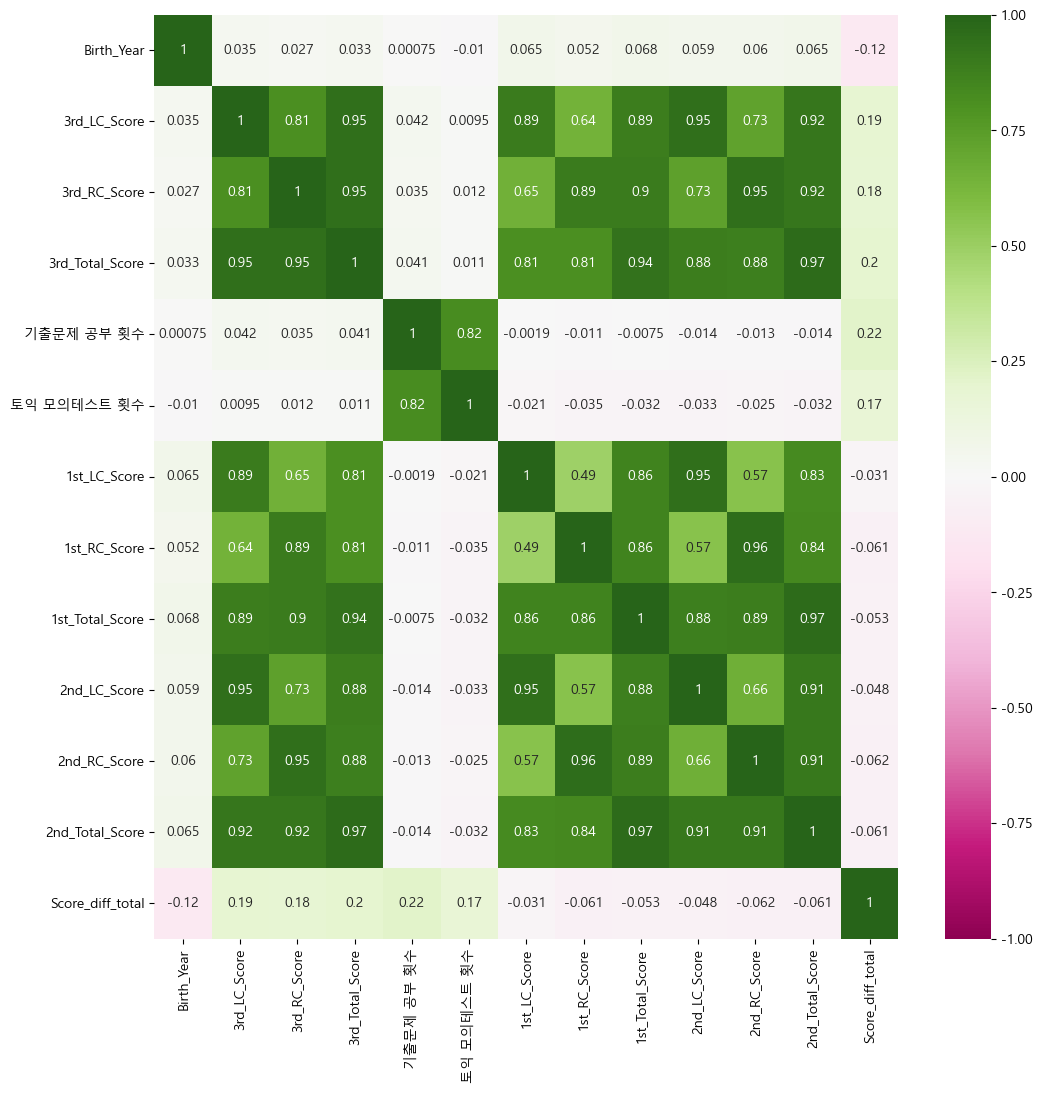

In [25]:
## 상관계수값을 heatmap을 이용하여 시각화 : sns.heatmap

plt.figure(figsize = (12,12))
## 코드 입력
sns.heatmap()

plt.show()

C:\Users\meo47\AppData\Local\Temp\ipykernel_10356\815905512.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base_data.corr(),


<Axes: >

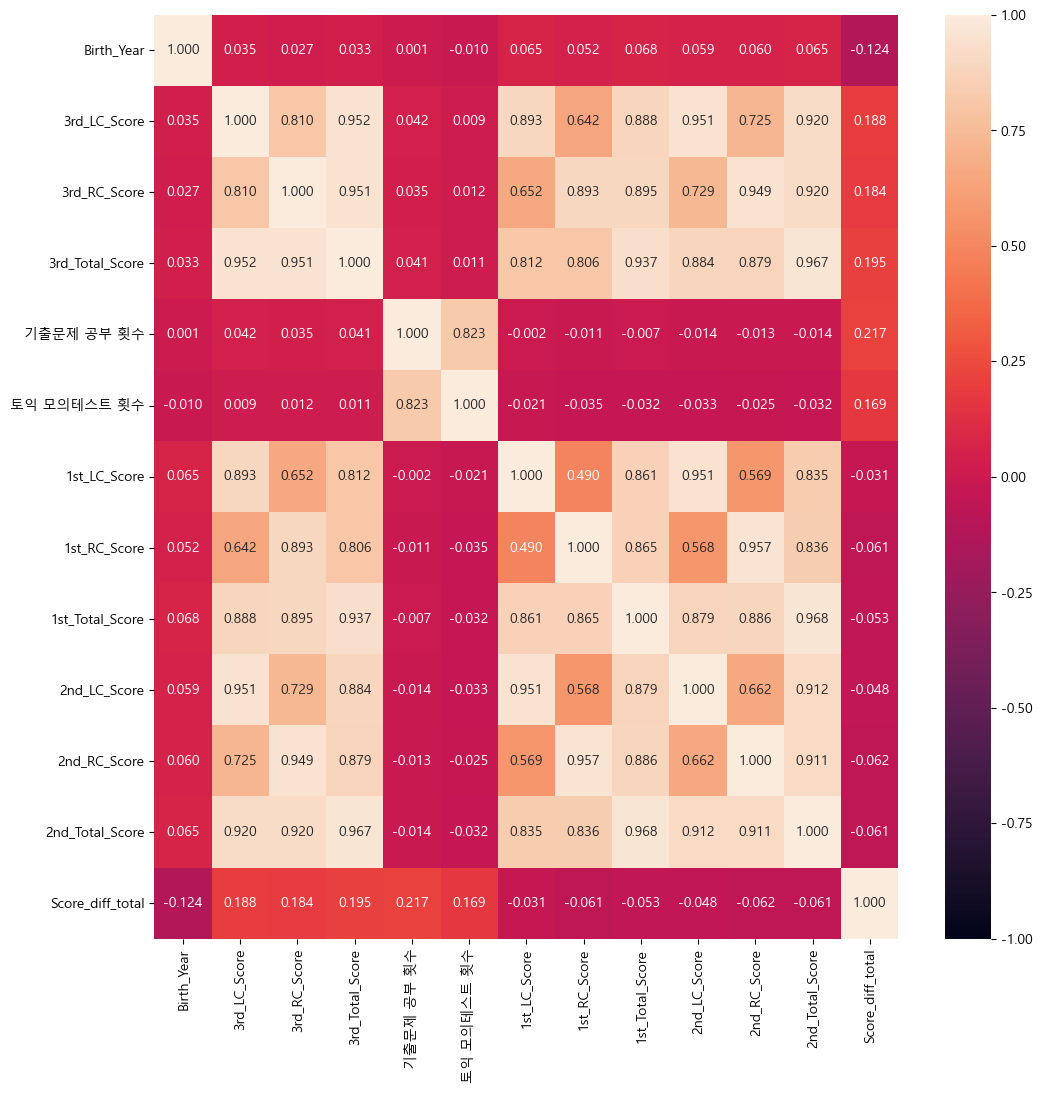

In [178]:
plt.figure(figsize = (12,12))

sns.heatmap(base_data.corr(),
           annot=True,
           fmt = '.3f',
           vmin= -1, vmax=1)

### target과 상관계수 상위 3개 살펴보기

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-2) 기출문제 공부 횟수

In [102]:
## 가설 수립
## 귀무 가설(H0) : 상관계수는 0이다(=상관관계가 없다.)
## 대립 가설(H1) : 상관계수는 0이 아니다(=상관관계가 있다.)
## p-value가 0.05 이상이면 귀무가설

In [28]:
# 상관분석 (pearsonr)
## 코드 입력
spst.pearsonr(base_data['기출문제 공부 횟수'], base_data['Score_diff_total'])

PearsonRResult(statistic=0.21652328806766585, pvalue=1.020785279200108e-06)

In [113]:
# regplot으로 시각화
plt.figure(figsize = (12,8))
## 코드 입력
sns.regplot()

plt.grid()
plt.show()

ValueError: need at least one array to concatenate

<Figure size 1200x800 with 0 Axes>

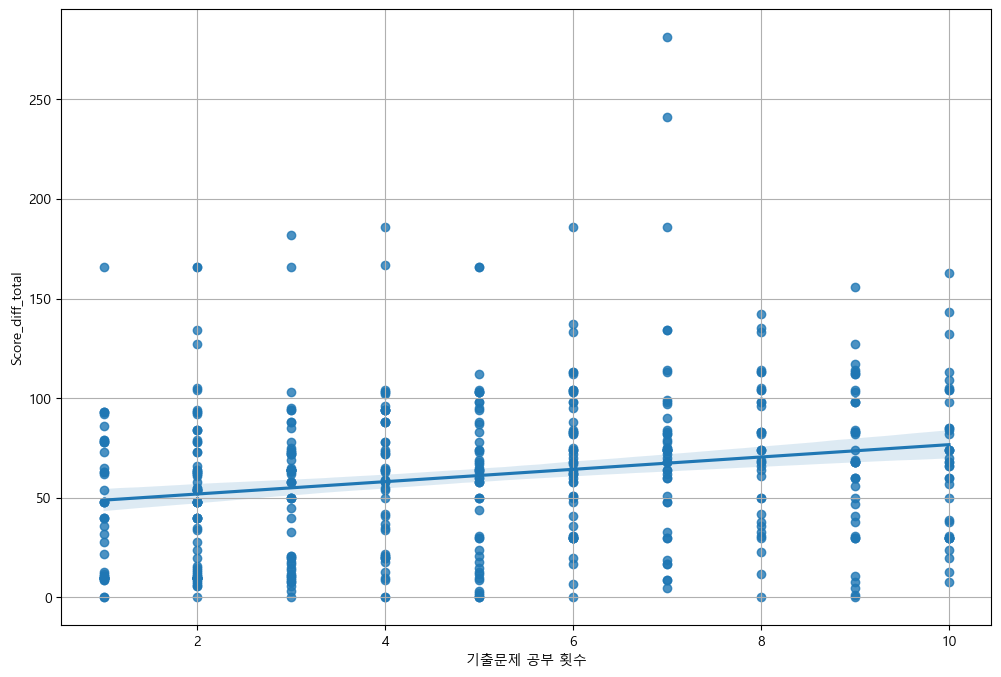

In [114]:
plt.figure(figsize=(12,8))
sns.regplot(x='기출문제 공부 횟수', y= 'Score_diff_total', data= base_data)
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-3) 토익 모의테스트 횟수

In [105]:
## 가설 수립
## 귀무 가설(H0) : 상관계수는 0이다(=상관관계가 없다.)
## 대립 가설(H1) : 상관계수는 0이 아니다(=상관관계가 있다.)
## p-value가 0.05 이상이면 귀무가설

In [30]:
# 상관분석 (pearsonr)
## 코드 입력

PearsonRResult(statistic=0.16873093322890687, pvalue=0.00015021865019138392)

In [115]:
spst.pearsonr(base_data['토익 모의테스트 횟수'], base_data['Score_diff_total'])

PearsonRResult(statistic=0.16873093322890687, pvalue=0.00015021865019138392)

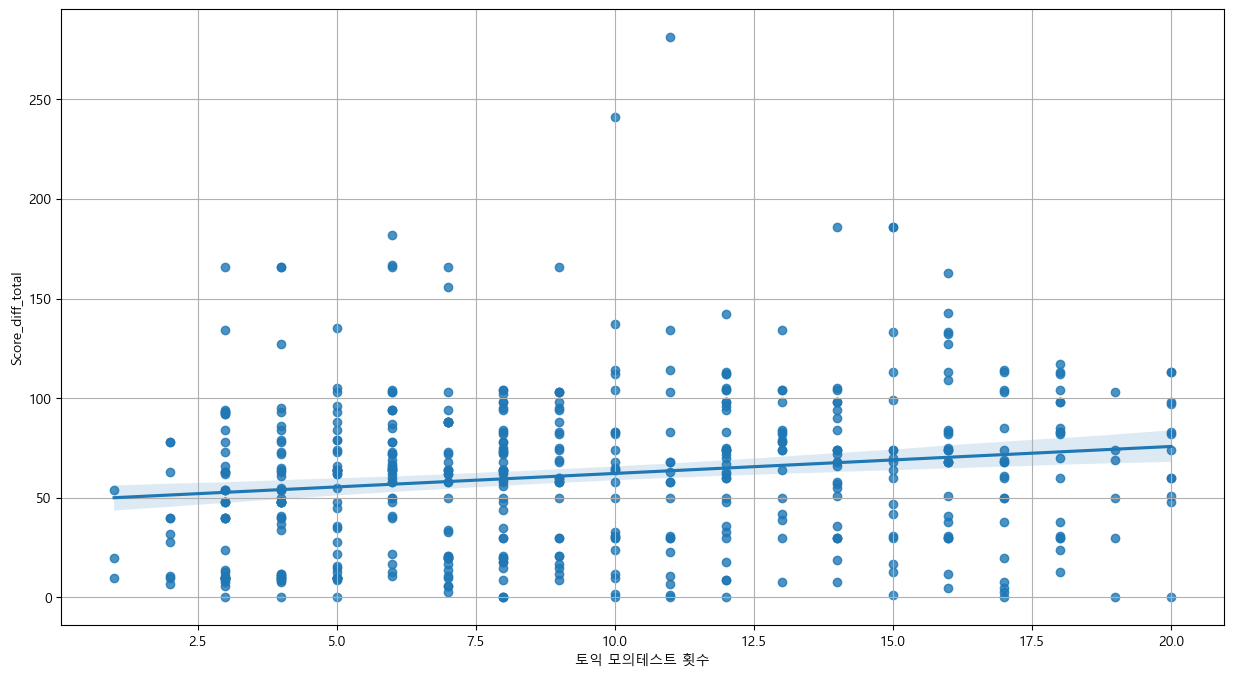

In [31]:
# regplot으로 시각화

plt.figure(figsize = (15,8))
## 코드 입력
sns.regplot()

plt.grid()
plt.show()

<Axes: xlabel='토익 모의테스트 횟수', ylabel='Score_diff_total'>

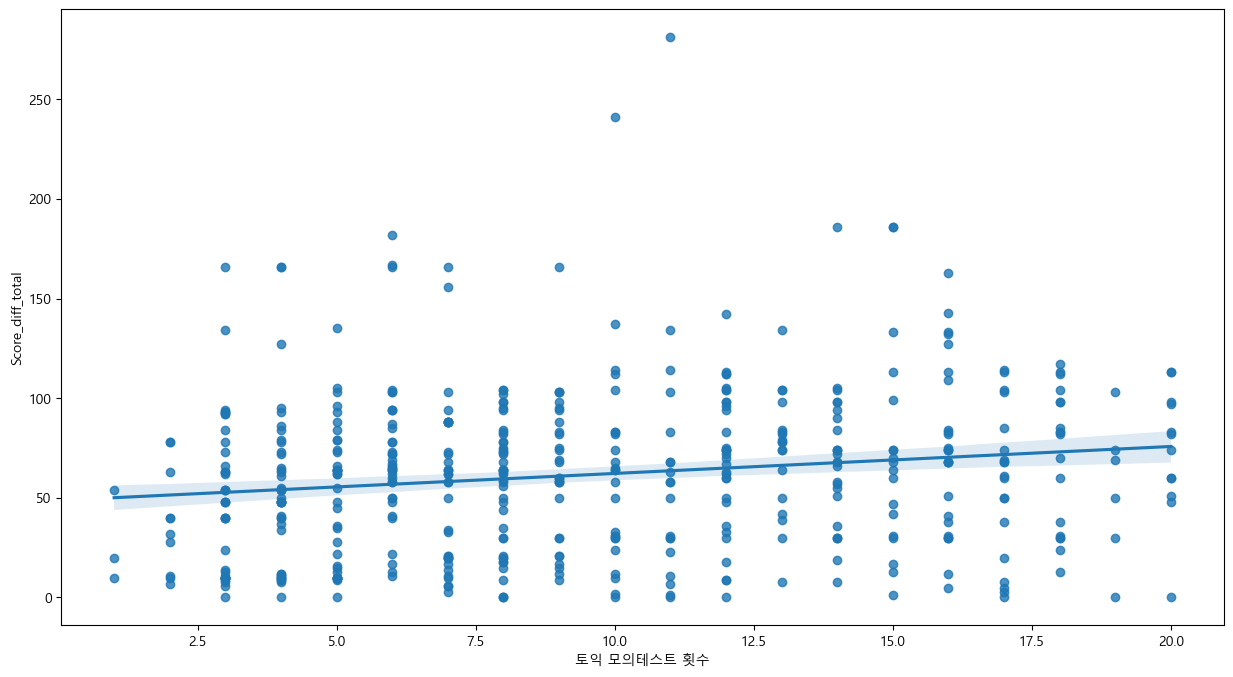

In [118]:
plt.figure(figsize=(15,8))
sns.regplot(x = '토익 모의테스트 횟수', y= 'Score_diff_total', data = base_data)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-4) 2차 종합점수

In [108]:
## 가설 수립
## 귀무 가설(H0) : 상관계수는 0이다(=상관관계가 없다.)
## 대립 가설(H1) : 상관계수는 0이 아니다(=상관관계가 있다.)
## p-value가 0.05 이상이면 귀무가설

In [32]:
## 상관분석 (pearsonr)
## 코드 입력

PearsonRResult(statistic=-0.06058469921846522, pvalue=0.17619398209815046)

In [121]:
base_data.columns

Index(['ID', 'Gender', 'Birth_Year', '3rd_LC_Score', '3rd_RC_Score',
       '3rd_Total_Score', '학습목표', '학습방법', '강의 학습 교재 유형', '학습빈도', '기출문제 공부 횟수',
       '취약분야 인지 여부', '토익 모의테스트 횟수', '1st_LC_Score', '1st_RC_Score',
       '1st_Total_Score', '2nd_LC_Score', '2nd_RC_Score', '2nd_Total_Score',
       'Score_diff_total'],
      dtype='object')

In [122]:
spst.pearsonr(base_data['2nd_Total_Score'], base_data['Score_diff_total'])

PearsonRResult(statistic=-0.06058469921846522, pvalue=0.17619398209815046)

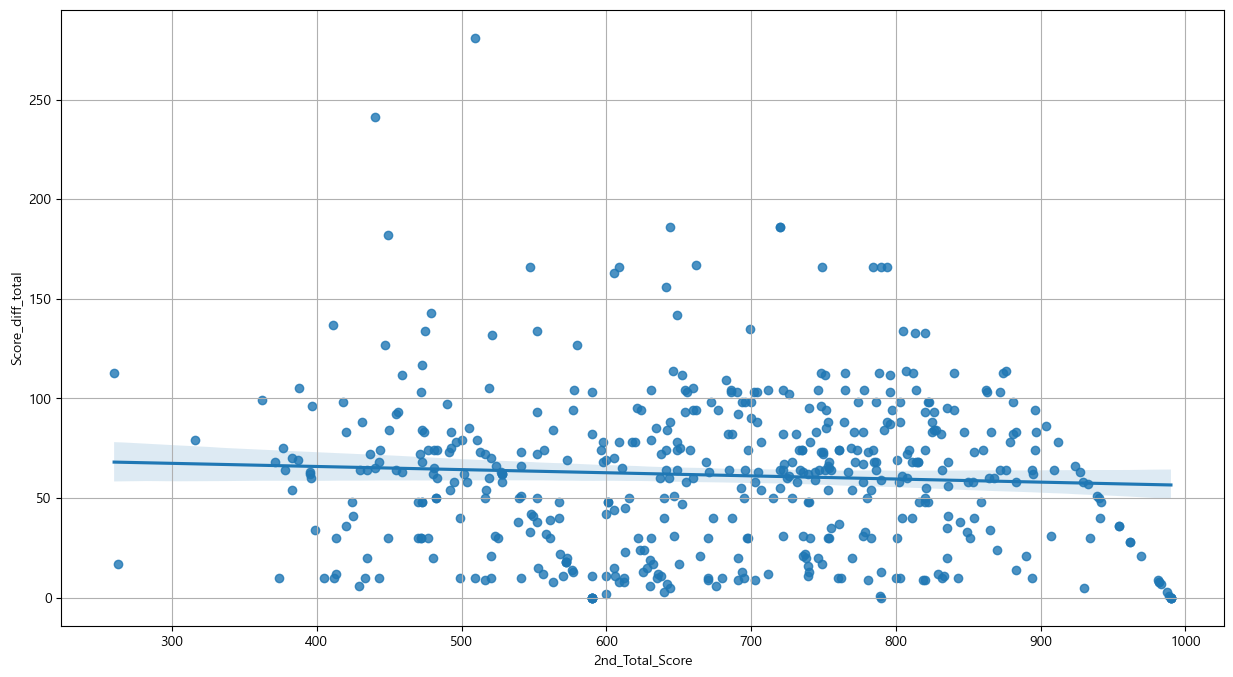

In [33]:
## regplot으로 시각화
plt.figure(figsize = (15,8))
## 코드 입력
sns.regplot()

plt.grid()
plt.show()

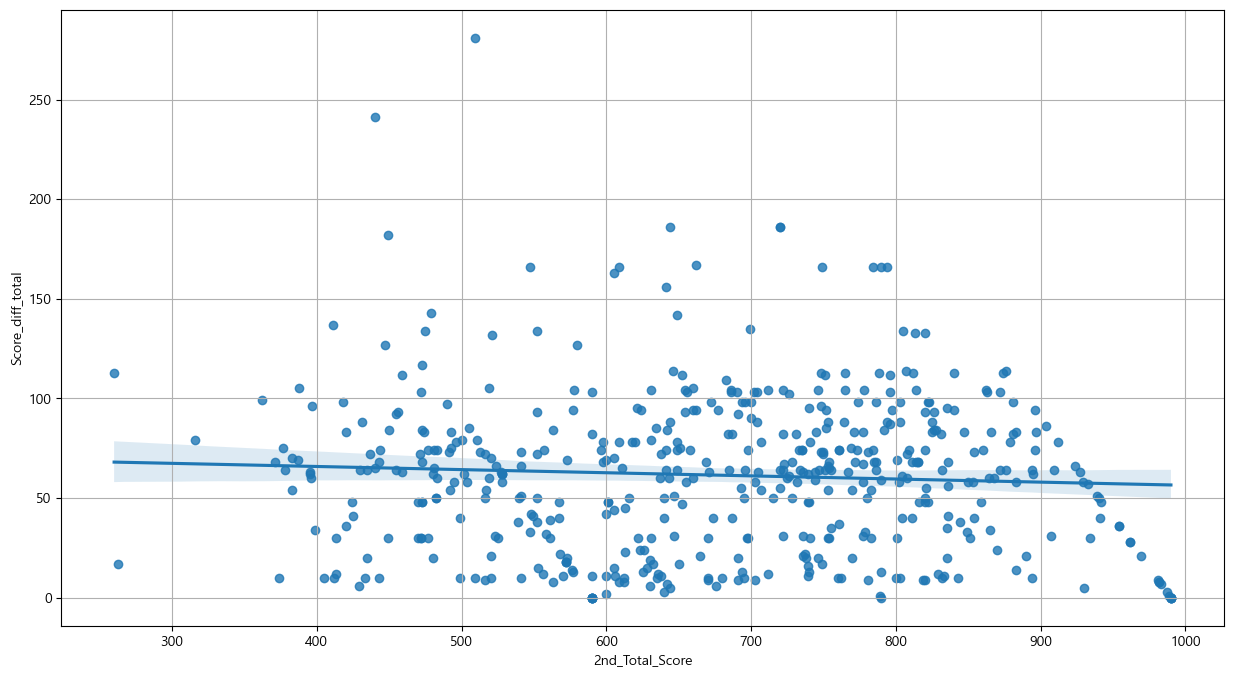

In [124]:
plt.figure(figsize = (15,8))
sns.regplot( x= '2nd_Total_Score', y = 'Score_diff_total', data = base_data)
plt.grid()
plt.show()

#### &nbsp;&nbsp; 3-2) 범주형 feature -> 수치형 target



In [111]:
## 범주형 feature

## 'Gender', '학습목표', '학습방법', '강의 학습 교재 유형', '학습빈도', '취약분야 인지 여부', 'age_group', 

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-1) Gender 

In [112]:
## 가설 수립
## 귀무 가설(H0) : 유의미한 차이가 없다.
## 대립 가설(H1) : 차이가 있다.

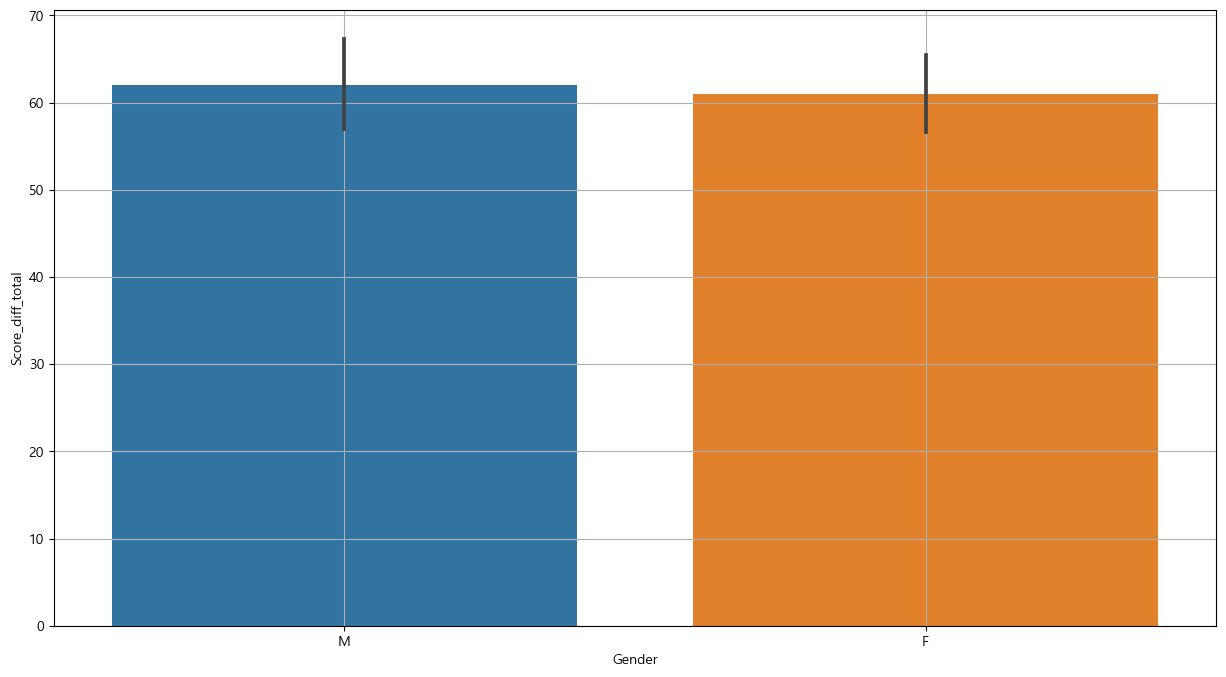

In [34]:
## 그래프 분석 : barplot

plt.figure(figsize = (15,8))
## 코드 입력
sns.barplot()

plt.grid()
plt.show()

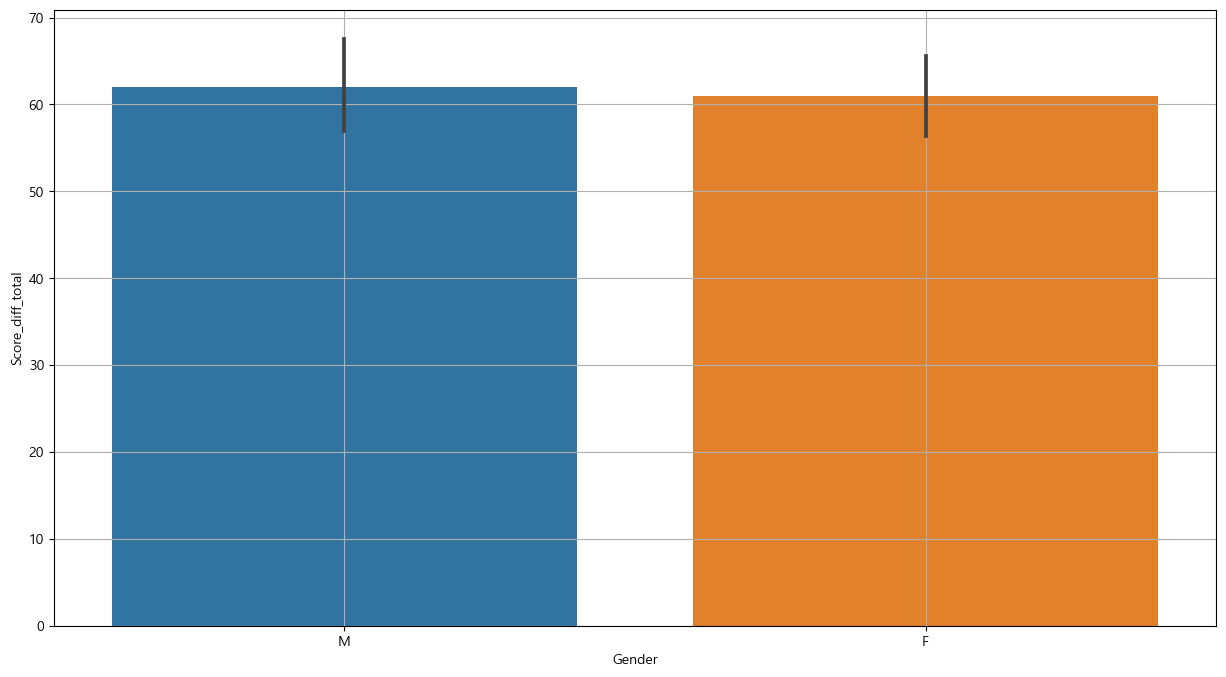

In [126]:
plt.figure(figsize =(15,8))
sns.barplot(x='Gender', y='Score_diff_total', data= base_data)
plt.grid()
plt.show()

In [127]:
## 범주 데이터 확인 : value_counts()
## 코드 입력
base_data['Gender'].value_counts()

M    250
F    250
Name: Gender, dtype: int64

In [36]:
## 평균 분석 : ttest_ind
## 코드 입력

t_male = 
t_female = 

Ttest_indResult(statistic=0.2822086676965537, pvalue=0.7779007564857058)

In [134]:
t_male= base_data.loc[base_data['Gender']=='M', 'Score_diff_total']
t_female= base_data.loc[base_data['Gender']== 'F', 'Score_diff_total']

spst.ttest_ind(t_male, t_female)

Ttest_indResult(statistic=0.2822086676965537, pvalue=0.7779007564857058)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-2) 학습목표

In [116]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

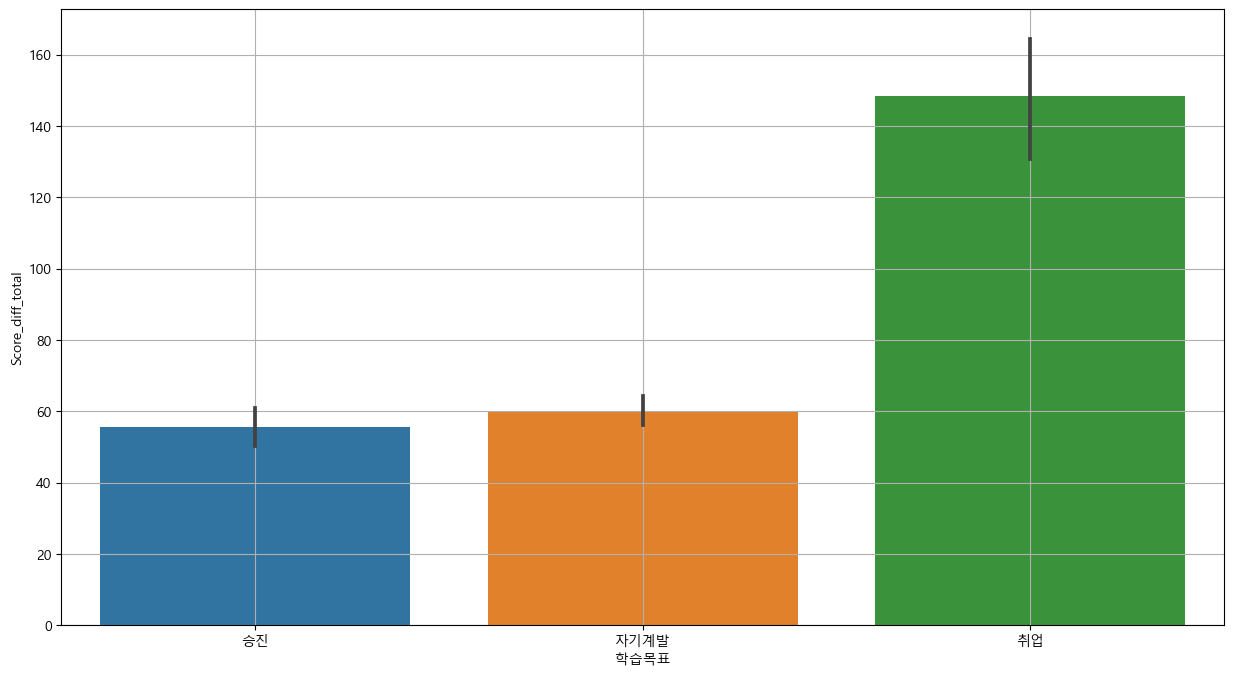

In [37]:
## 그래프 분석 : barplot

plt.figure(figsize = (15,8))
## 코드 입력
sns.barplot()

plt.grid()
plt.show()

In [135]:
base_data.columns

Index(['ID', 'Gender', 'Birth_Year', '3rd_LC_Score', '3rd_RC_Score',
       '3rd_Total_Score', '학습목표', '학습방법', '강의 학습 교재 유형', '학습빈도', '기출문제 공부 횟수',
       '취약분야 인지 여부', '토익 모의테스트 횟수', '1st_LC_Score', '1st_RC_Score',
       '1st_Total_Score', '2nd_LC_Score', '2nd_RC_Score', '2nd_Total_Score',
       'Score_diff_total'],
      dtype='object')

In [38]:
## 범주 데이터 확인 : value_counts()
## 코드 입력

자기계발    329
승진      155
취업       16
Name: 학습목표, dtype: int64

In [138]:
base_data['학습목표'].value_counts()

자기계발    329
승진      155
취업       16
Name: 학습목표, dtype: int64

In [39]:
## 분산 분석 : f_oneway
## 코드 입력

anova_1 = 
anova_2 = 
anova_3 = 

F_onewayResult(statistic=47.67396089358833, pvalue=1.1460686383036893e-19)

In [188]:
t_target_anova_1 = base_data.loc[base_data.학습목표 == '자기계발', 'Score_diff_total']
t_target_anova_2 = base_data.loc[base_data.학습목표 == '승진', 'Score_diff_total']
t_target_anova_3 = base_data.loc[base_data.학습목표 == '취업', 'Score_diff_total']
spst.f_oneway(t_target_anova_1,t_target_anova_2,t_target_anova_3)

F_onewayResult(statistic=47.67396089358833, pvalue=1.1460686383036893e-19)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-3) 학습방법 

In [120]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

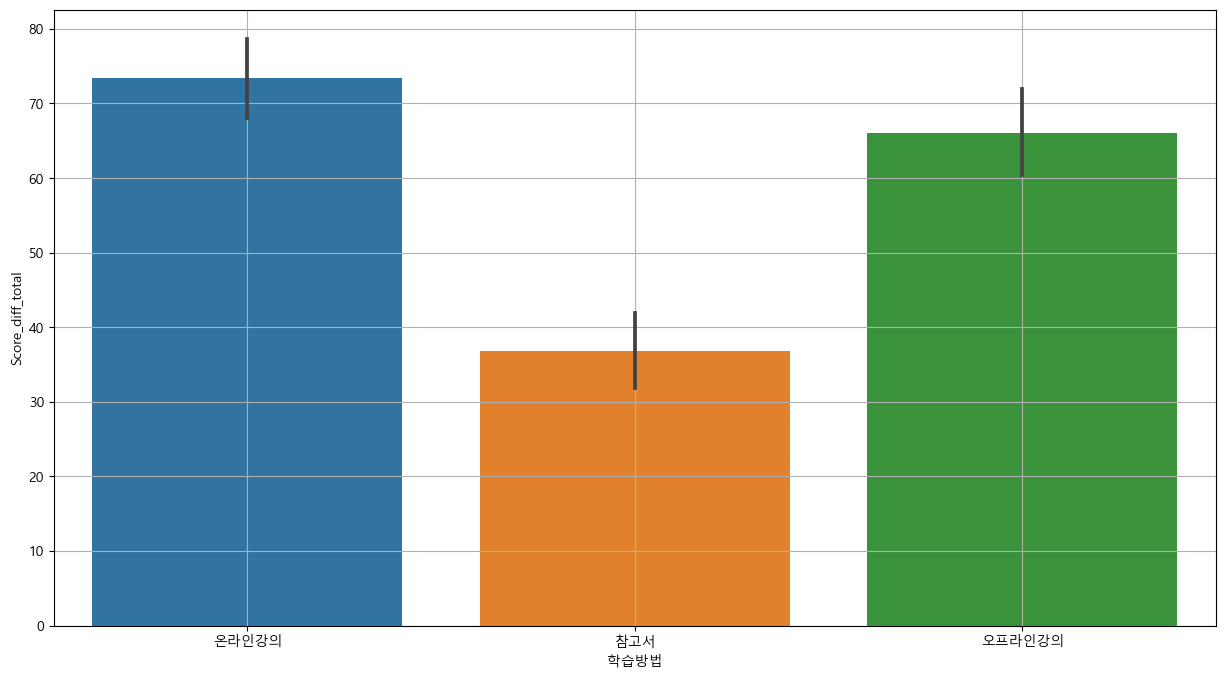

In [40]:
## 그래프 분석 : barplot

plt.figure(figsize = (15,8))
## 코드 입력
sns.barplot()

plt.grid()
plt.show()

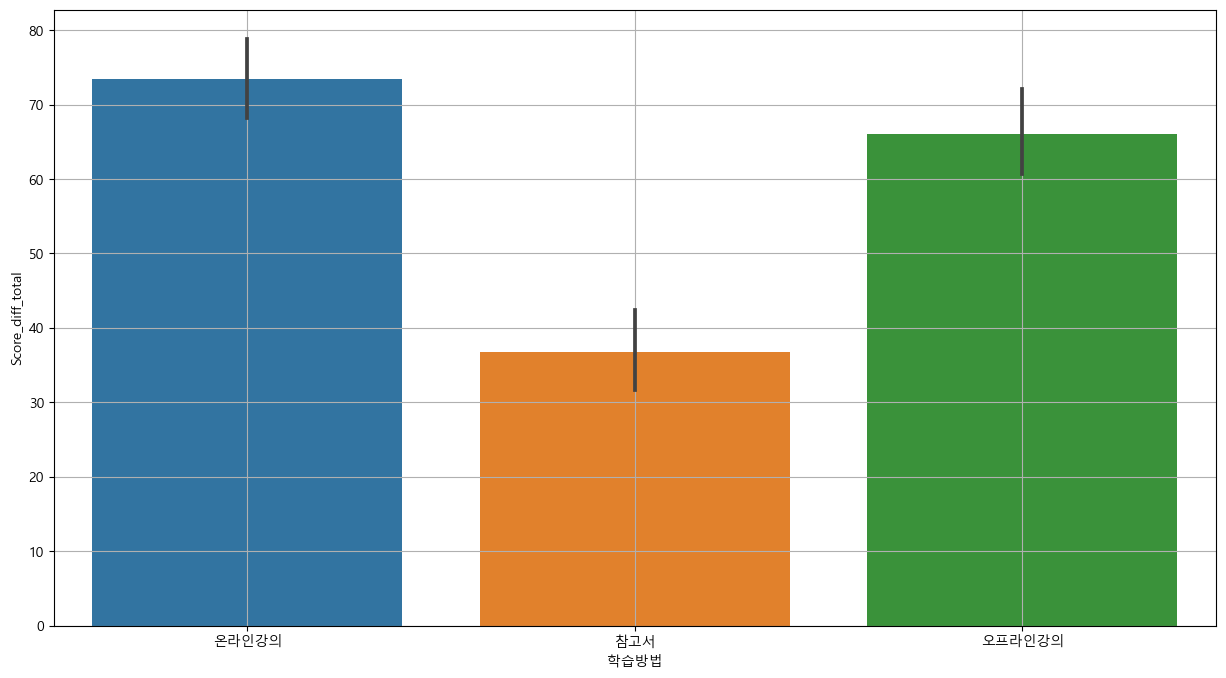

In [147]:
plt.figure(figsize=(15,8))
sns.barplot(x='학습방법',y = 'Score_diff_total', data = base_data)
plt.grid()
plt.show()

In [41]:
## 범주 데이터 확인 : value_counts()
## 코드 입력

온라인강의     208
오프라인강의    162
참고서       130
Name: 학습방법, dtype: int64

In [148]:
base_data['학습방법'].value_counts()

온라인강의     208
오프라인강의    162
참고서       130
Name: 학습방법, dtype: int64

In [42]:
## 분산 분석 : f_oneway()
## 코드 입력
anova_1 = 
anova_2 = 
anova_3 = 

F_onewayResult(statistic=41.419201452370245, pvalue=2.3055747160060528e-17)

In [189]:
t_how_anova_1 = base_data.loc[base_data.학습방법 == '온라인강의','Score_diff_total']
t_how_anova_2 = base_data.loc[base_data.학습방법 == '오프라인강의','Score_diff_total']
t_how_anova_3 = base_data.loc[base_data.학습방법 == '참고서', 'Score_diff_total']

spst.f_oneway(t_how_anova_1, t_how_anova_2, t_how_anova_3)

F_onewayResult(statistic=41.419201452370245, pvalue=2.3055747160060528e-17)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-4) 강의 학습 교재 유형

In [124]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

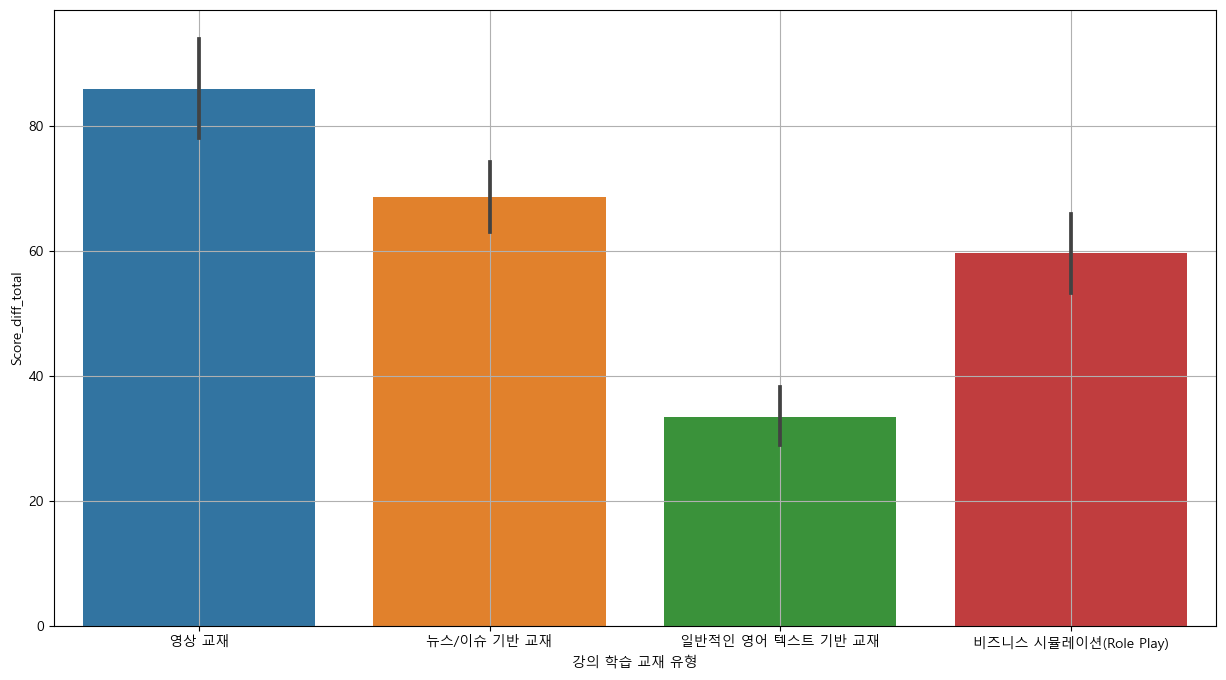

In [43]:
## 그래프 분석 : barplot

plt.figure(figsize = (15,8))
## 코드 입력
sns.barplot()

plt.grid()
plt.show()

In [153]:
base_data.columns

Index(['ID', 'Gender', 'Birth_Year', '3rd_LC_Score', '3rd_RC_Score',
       '3rd_Total_Score', '학습목표', '학습방법', '강의 학습 교재 유형', '학습빈도', '기출문제 공부 횟수',
       '취약분야 인지 여부', '토익 모의테스트 횟수', '1st_LC_Score', '1st_RC_Score',
       '1st_Total_Score', '2nd_LC_Score', '2nd_RC_Score', '2nd_Total_Score',
       'Score_diff_total'],
      dtype='object')

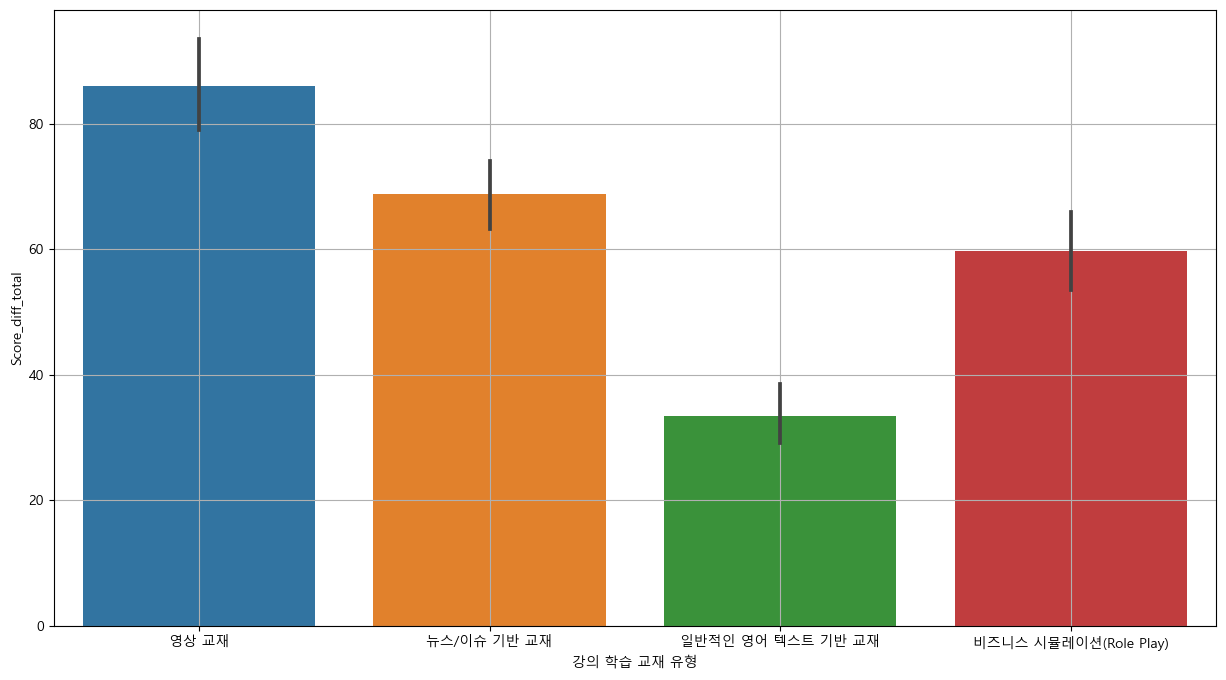

In [154]:
plt.figure(figsize=(15,8))
sns.barplot(x='강의 학습 교재 유형', y= 'Score_diff_total', data = base_data )
plt.grid()
plt.show()

In [155]:
## 범주 데이터 확인 : value_counts()
## 코드 입력

base_data['강의 학습 교재 유형'].value_counts()

일반적인 영어 텍스트 기반 교재        136
영상 교재                    128
뉴스/이슈 기반 교재              122
비즈니스 시뮬레이션(Role Play)    114
Name: 강의 학습 교재 유형, dtype: int64

In [45]:
## 분산 분석 : f_oneway
## 코드 입력

anova_1 = 
anova_2 = 
anova_3 = 
anova_4 = 

F_onewayResult(statistic=52.47853679755316, pvalue=1.7913087495809398e-29)

In [190]:
t_type_anova_1 = base_data.loc[base_data['강의 학습 교재 유형'] == '일반적인 영어 텍스트 기반 교재', 'Score_diff_total']
t_type_anova_2 = base_data.loc[base_data['강의 학습 교재 유형'] == '영상 교재', 'Score_diff_total']
t_type_anova_3 = base_data.loc[base_data['강의 학습 교재 유형'] == '뉴스/이슈 기반 교재', 'Score_diff_total']
t_type_anova_4 = base_data.loc[base_data["강의 학습 교재 유형"] == '비즈니스 시뮬레이션(Role Play)', 'Score_diff_total']

spst.f_oneway(t_type_anova_1,t_type_anova_2, t_type_anova_3, t_type_anova_4)

F_onewayResult(statistic=52.47853679755316, pvalue=1.7913087495809398e-29)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-5) 학습빈도

In [128]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

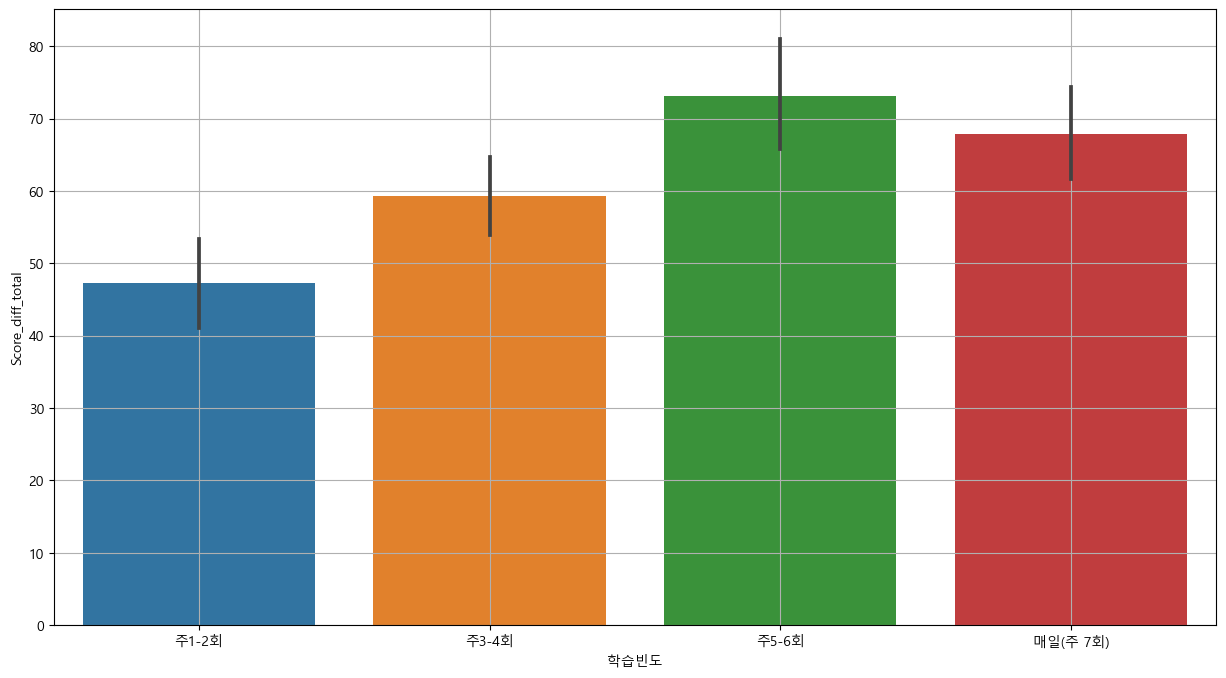

In [46]:
# 그래프 분석 : barplot

plt.figure(figsize = (15,8))
## 코드 입력
sns.barplot()

plt.grid()
plt.show()

In [162]:
base_data.columns

Index(['ID', 'Gender', 'Birth_Year', '3rd_LC_Score', '3rd_RC_Score',
       '3rd_Total_Score', '학습목표', '학습방법', '강의 학습 교재 유형', '학습빈도', '기출문제 공부 횟수',
       '취약분야 인지 여부', '토익 모의테스트 횟수', '1st_LC_Score', '1st_RC_Score',
       '1st_Total_Score', '2nd_LC_Score', '2nd_RC_Score', '2nd_Total_Score',
       'Score_diff_total'],
      dtype='object')

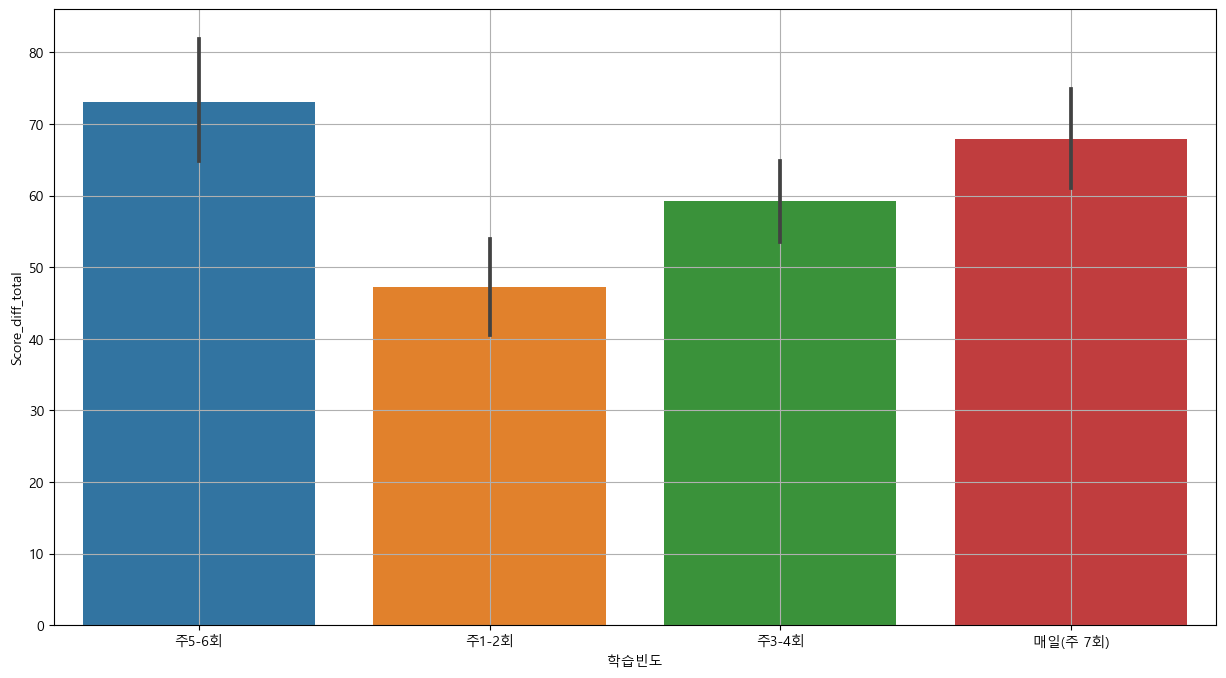

In [163]:
plt.figure(figsize = (15,8))
sns.barplot(x='학습빈도', y = 'Score_diff_total', data=base_data)
plt.grid()
plt.show()

In [47]:
## 범주 데이터 확인 : value_counts()
## 코드 입력


주3-4회       151
주5-6회       127
주1-2회       124
매일(주 7회)     98
Name: 학습빈도, dtype: int64

In [165]:
base_data['학습빈도'].value_counts()

주3-4회       151
주5-6회       127
주1-2회       124
매일(주 7회)     98
Name: 학습빈도, dtype: int64

In [48]:
## 분산 분석 : f_oneway
## 코드 입력

anova_1 = 
anova_2 = 
anova_3 = 
anova_4 = 

F_onewayResult(statistic=10.462186683951074, pvalue=1.1022320109042592e-06)

In [191]:
t_freq_anova_1 = base_data.loc[base_data['학습빈도']=='주3-4회', 'Score_diff_total']
t_freq_anova_2 = base_data.loc[base_data['학습빈도']=='주5-6회', 'Score_diff_total']
t_freq_anova_3 = base_data.loc[base_data['학습빈도']=='주1-2회', 'Score_diff_total']
t_freq_anova_4 = base_data.loc[base_data['학습빈도']=='매일(주 7회)', 'Score_diff_total']

spst.f_oneway(t_freq_anova_1,t_freq_anova_2, t_freq_anova_3, t_freq_anova_4)

F_onewayResult(statistic=10.462186683951074, pvalue=1.1022320109042592e-06)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-6) 취약분야 인지 여부

In [132]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

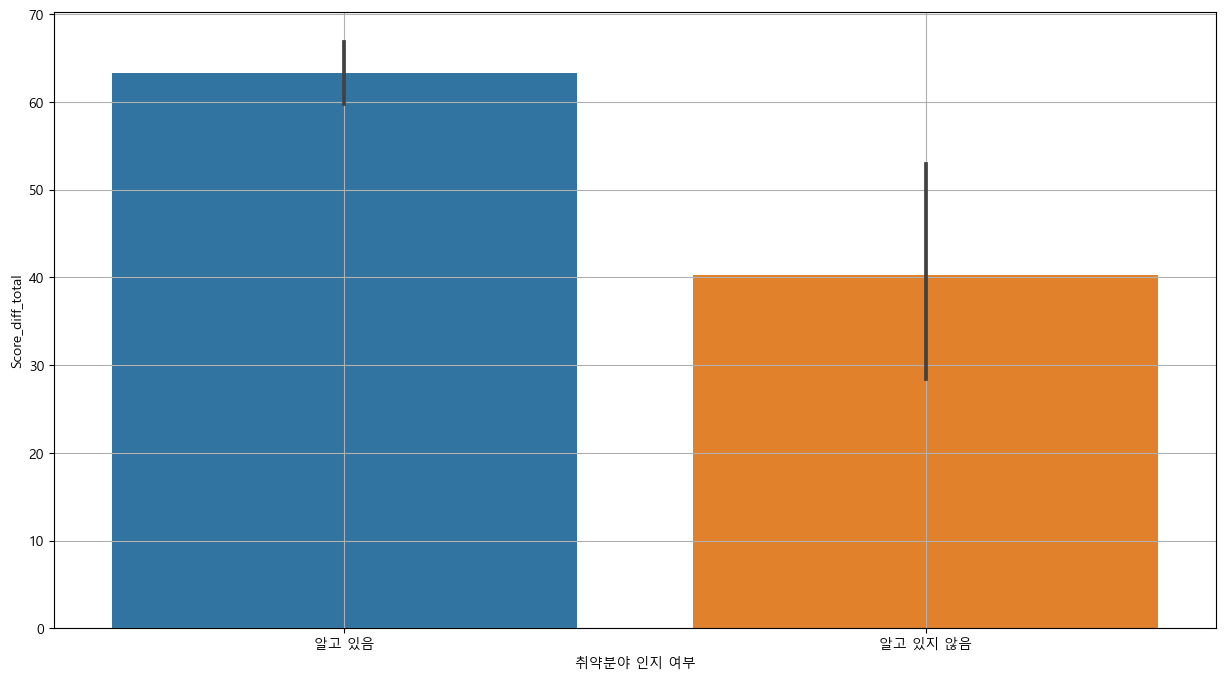

In [49]:
## 그래프 분석 : barplot

plt.figure(figsize = (15,8))
## 코드 입력
sns.barplot()

plt.grid()
plt.show()

In [167]:
base_data.columns

Index(['ID', 'Gender', 'Birth_Year', '3rd_LC_Score', '3rd_RC_Score',
       '3rd_Total_Score', '학습목표', '학습방법', '강의 학습 교재 유형', '학습빈도', '기출문제 공부 횟수',
       '취약분야 인지 여부', '토익 모의테스트 횟수', '1st_LC_Score', '1st_RC_Score',
       '1st_Total_Score', '2nd_LC_Score', '2nd_RC_Score', '2nd_Total_Score',
       'Score_diff_total'],
      dtype='object')

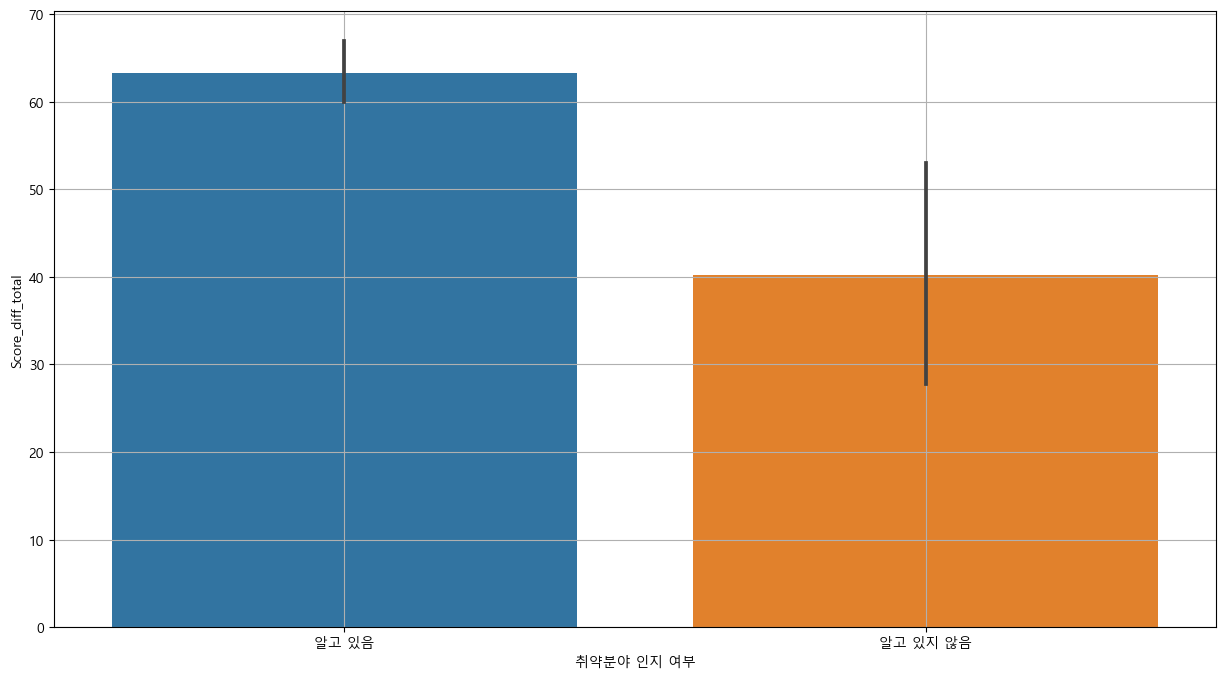

In [168]:
plt.figure(figsize=(15,8))
sns.barplot(x='취약분야 인지 여부', y = 'Score_diff_total', data= base_data)
plt.grid()
plt.show()

In [50]:
## 범주 데이터 확인 : value_counts
## 코드 입력

알고 있음       461
알고 있지 않음     39
Name: 취약분야 인지 여부, dtype: int64

In [170]:
base_data['취약분야 인지 여부'].value_counts()

알고 있음       461
알고 있지 않음     39
Name: 취약분야 인지 여부, dtype: int64

In [51]:
## 평균 분석 : ttest_ind
## 코드 입력
t_yes = 
t_no = 

Ttest_indResult(statistic=3.5228688483686006, pvalue=0.00046620434773948446)

In [172]:
t_yes = base_data.loc[base_data['취약분야 인지 여부']=='알고 있음','Score_diff_total']
t_no =  base_data.loc[base_data['취약분야 인지 여부']=='알고 있지 않음', 'Score_diff_total']

spst.ttest_ind(t_yes, t_no)

Ttest_indResult(statistic=3.5228688483686006, pvalue=0.00046620434773948446)

# [정리] 이변량 분석을 통해 파악된 비즈니스 인사이트는 무엇인가요?

## 이변량 계수 통계량 모음

In [196]:
print('='*100, '\n이변량 분석', sep='')
print('귀무가설 : 집단 평균 간에 유의미한 차이가 없다.')
print('대립가설 : 집단 평균 간에 유의미한 차이가 있다.')
print('p-value가 0.05다 크면 귀무가설 채택')
print('='*100,'\n')

print('-'*100)
print('3-2-1 Gender - M, F')
display(spst.ttest_ind(t_male, t_female))

print('-'*100)
print('3-2-2 학습목표 - 자기계발, 승진, 취업')
display(spst.f_oneway(t_target_anova_1,t_target_anova_2,t_target_anova_3))

print('-'*100)
print('3-2-3 학습방법 - 온라인 강의, 참고서 학습방법, 오프라인 강의')
display(spst.f_oneway(t_how_anova_1, t_how_anova_2, t_how_anova_3))

print('-'*100)
print('3-2-4 강의 학습 교재 유형 - 영상 교재, 뉴스/이슈 기반 교재, 일반적인 영어 텍스트 기반 교재, 비즈니스 시뮬레이션(Role Play)')
display(spst.f_oneway(t_type_anova_1,t_type_anova_2, t_type_anova_3, t_type_anova_4))

print('-'*100)
print('3-2-5 학습빈도 - 주1-2회, 주3-4회, 주5-6회, 매일(주 7회)')
display(spst.f_oneway(t_freq_anova_1,t_freq_anova_2, t_freq_anova_3, t_freq_anova_4))

print('-'*100)
print('3-2-6 취약 분야 인지 여부 - 알고 있음, 알고 있지 않음')
display(spst.ttest_ind(t_yes, t_no))


print('='*100, '\n통계 분석', sep='')
print('='*100)

print('현재 Gender를 제외하고 p-value < 0.5 이므로 귀무가설 기각 집단 평균 간에 유의미한 차이가 존재한다.')

이변량 분석
귀무가설 : 집단 평균 간에 유의미한 차이가 없다.
대립가설 : 집단 평균 간에 유의미한 차이가 있다.
p-value가 0.05다 크면 귀무가설 채택

----------------------------------------------------------------------------------------------------
3-2-1 Gender - M, F


Ttest_indResult(statistic=0.2822086676965537, pvalue=0.7779007564857058)

----------------------------------------------------------------------------------------------------
3-2-2 학습목표 - 자기계발, 승진, 취업


F_onewayResult(statistic=47.67396089358833, pvalue=1.1460686383036893e-19)

----------------------------------------------------------------------------------------------------
3-2-3 학습방법 - 온라인 강의, 참고서 학습방법, 오프라인 강의


F_onewayResult(statistic=41.419201452370245, pvalue=2.3055747160060528e-17)

----------------------------------------------------------------------------------------------------
3-2-4 강의 학습 교재 유형 - 영상 교재, 뉴스/이슈 기반 교재, 일반적인 영어 텍스트 기반 교재, 비즈니스 시뮬레이션(Role Play)


F_onewayResult(statistic=52.47853679755316, pvalue=1.7913087495809398e-29)

----------------------------------------------------------------------------------------------------
3-2-5 학습빈도 - 주1-2회, 주3-4회, 주5-6회, 매일(주 7회)


F_onewayResult(statistic=10.462186683951074, pvalue=1.1022320109042592e-06)

----------------------------------------------------------------------------------------------------
3-2-6 취약 분야 인지 여부 - 알고 있음, 알고 있지 않음


Ttest_indResult(statistic=3.5228688483686006, pvalue=0.00046620434773948446)

통계 분석
현재 Gender를 제외하고 p-value < 0.5 이므로 귀무가설 기각 집단 평균 간에 유의미한 차이가 존재한다.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

file = 'toeic_preprocessed_data.csv'
base_data = pd.read_csv(file)

# 필요없는 'ID'는 삭제
base_data.drop(columns='ID', inplace=True)

keys = []
spst_list=[]
spst_dict = {}


# 숫자형인 컬럼을 key 값으로 사용하기 위해 미리 준비
for i in base_data.columns:
    if ( base_data[i].dtypes=='int64'):
#         print(i, base_data[i].dtypes)
        keys.append(i)
# print(keys)
        
    
    
# 피어슨 상관분석 p-value 값을 value로 사용하기 위해 준비
for i in keys:
    spst_list.append(list(spst.pearsonr(base_data[i], base_data['Score_diff_total'] ))[1])
# print(spst_list)
# print('='*100, '\n상관계수 p-value 출력', sep='')
spst_dict = dict(zip(keys, spst_list))
# display(spst_dict)


# 딕셔너리 형태로 만들어 p-value 값을 아래로 오름차순으로 출력
# lambda 매개변수 : 표현식
# items를 통해 키-값 쌍을 나타내는 튜플 리스트를 생성
# key = lambda x : x[1] 부분에서 'x'는 리스트에서 하나의 튜플
# x[1] 은 value 값을 정렬 기준으로 삼는다.
spst_dict = sorted( spst_dict.items(), key = lambda x : x[1])
# display(spst_dict)

for key, value in spst_dict:
    print(f'{key}:{value}')

Score_diff_total:0.0
기출문제 공부 횟수:1.020785279200108e-06
3rd_Total_Score:1.0815865396336184e-05
3rd_LC_Score:2.238002123155527e-05
3rd_RC_Score:3.5171524363778166e-05
토익 모의테스트 횟수:0.00015021865019138552
Birth_Year:0.005574758185560612
2nd_RC_Score:0.16579178135761932
1st_RC_Score:0.173614974719674
2nd_Total_Score:0.17619398209815063
1st_Total_Score:0.23374801727976413
2nd_LC_Score:0.28083614303623605
1st_LC_Score:0.4896304057579845


#### 상관계수 분석

- Pearson 상관분석에서 귀무가설은 "상관이 없다"로서 p-value가 0.05보다 작을 경우에 기각된다.
- 위의 오름차순 기준에서 자기 자신과의 p-value "0"을 제외하고 상관관계가 강한 것들을 분석하면 될 것이다.

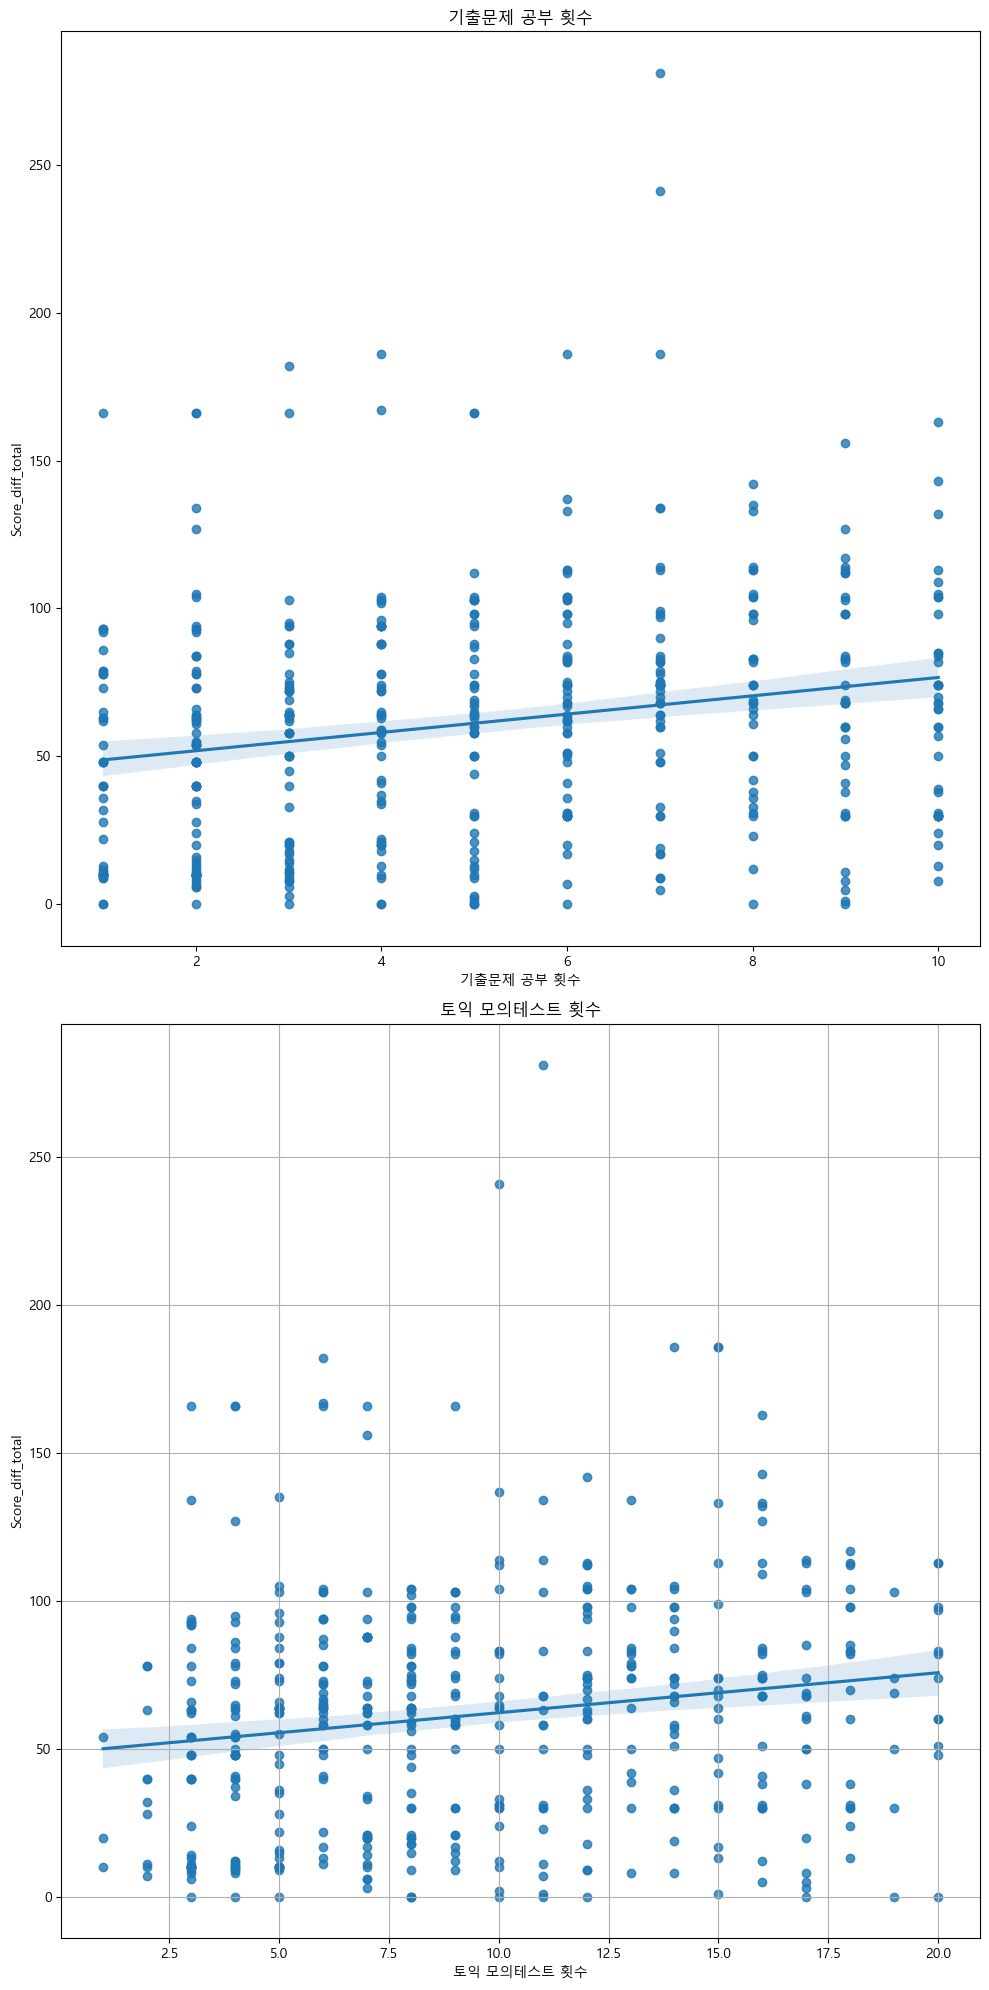

In [5]:
plt.figure(figsize=(10,20))

plt.subplot(2,1,1)
plt.title('기출문제 공부 횟수')
sns.regplot(x='기출문제 공부 횟수', y='Score_diff_total', data = base_data)

plt.subplot(2,1,2)
plt.title('토익 모의테스트 횟수')
sns.regplot(x='토익 모의테스트 횟수', y = 'Score_diff_total', data = base_data)

plt.grid()
plt.tight_layout()

<br><br><hr><br><br>

## <font color="orange">**4. 도전 미션** </font>


#### &nbsp;&nbsp; 4-1)  나이, 나이대 정보 추가 및 데이터 분석

  - 생년월일을 나이로 변경하여 **열(age)**을 추가하세요.
  - 나이로 변경한 열을 아래의 예시를 참고하여 연령대로 구분하여 **열(age group)**을 추가하세요.
    - 연령 구분 예시 : 20세 이하, 21세-25세, 26세-30세, 31세-35세, 36세-40세, 41세-45세, 46세-50세, 50세 이상
  - 나이, 나이대 데이터 특성에 맞는 단변량, 이변량 분석을 하세요.

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-1) 나이(age) 열 추가

In [ ]:
# 라이브러리 불러오기
from datetime import datetime

# 현재 날짜 구하기
now = datetime.now()

# 데이터프레임에서 Birth_Year 열의 값으로부터 현재 날짜(2023년도) 기준 나이 계산 
# 'age'열에 값 추가하기
## 코드 입력

# 확인
base_data

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-2) 나이(age) 단변량 분석

In [ ]:
## age 데이터의 기초 통계량 확인
## 코드 입력

## age 데이터 분포 시각화 확인
## 코드 입력


##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-3) 나이대(age_group) 열 추가

In [ ]:
## cut() 함수를 활용하여 나이 연령대 계산

## 각 나이 연령대 구간의 경계(bins) 정의
## 코드 입력
bins = 

## labels: 각 구간에 붙일 라벨
## 코드 입력
labels = 

## cut 함수 사용
## 코드 입력
base_data['age_group'] = 

## 데이터 확인
base_data


##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-4) 나이대(age_group) 단변량 분석

In [ ]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
## 코드 입력


## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
## 코드 입력

# age_group 기준으로 데이터 분포 시각화 확인 : countplot()
## 코드 입력


##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-5) 나이(age) -> Target 이변량 분석

In [140]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

In [ ]:
## 상관분석 (pearsonr)
## 코드 입력


## regplot으로 시각화
## 코드 입력



##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-6) 나이대(age_group) -> Target 이변량 분석

In [ ]:
## barplot 시각화
## 코드 입력


In [ ]:
## 범주 데이터 확인
## 코드 입력


In [ ]:
## 분산 분석 : f_oneway
## 코드 입력



#### &nbsp;&nbsp; 4-2) 1,2회차 점수 차이 정보 추가 및 데이터 분석

* **세부요구사항**
    - 1,2회차 점수 차이 ( 2회차 점수 - 1회차 점수)를 구하여 **열(Score_diff_total_2_1)**을 추가하세요.
    - 1,2회차 점수 차이 데이터 특성에 맞는 단변량, 이변량 분석을 하세요.

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2-1) 1,2회 점수 차 (Score_diff_total_2_1) 열 추가

In [145]:
## 'Score_diff_total_2_1' = '2nd_Total_Score' - '1st_Total_Score'
## 코드 입력

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2-2) Score_diff_total_2_1 단변량 분석

In [ ]:
## Score_diff_total_2_1 데이터의 기초 통계량 확인
## 코드 입력

## Score_diff_total_2_1  데이터 분포 시각화 확인
## 코드 입력



##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2-3) Score_diff_2_1 -> Target 이변량 분석

In [ ]:
## 상관분석 (pearsonr)
## 코드 입력

## regplot으로 시각화
## 코드 입력



#### &nbsp;&nbsp; 4-3) 추가하고 싶은 정보를 생성하고, 이에 대한 단변량/이변량 분석을 수행

In [150]:
## 열(데이터) 추가
## 코드 입력


In [ ]:
## 단변량 분석

# 기초 통계량 확인
## 코드 입력


# 데이터 분포 시각화 확인
## 코드 입력

In [ ]:
## 이변량 분석

# 상관분석 (pearsonr)
## 코드 입력

# regplot으로 시각화
## 코드 입력


## [정리] 3가지 추가 feature를 통해 파악된 비즈니스 인사이트는 무엇인가요?

## <font color="green"> **Mission Clear** </font> &nbsp; &nbsp; 수고하셨습니다!!